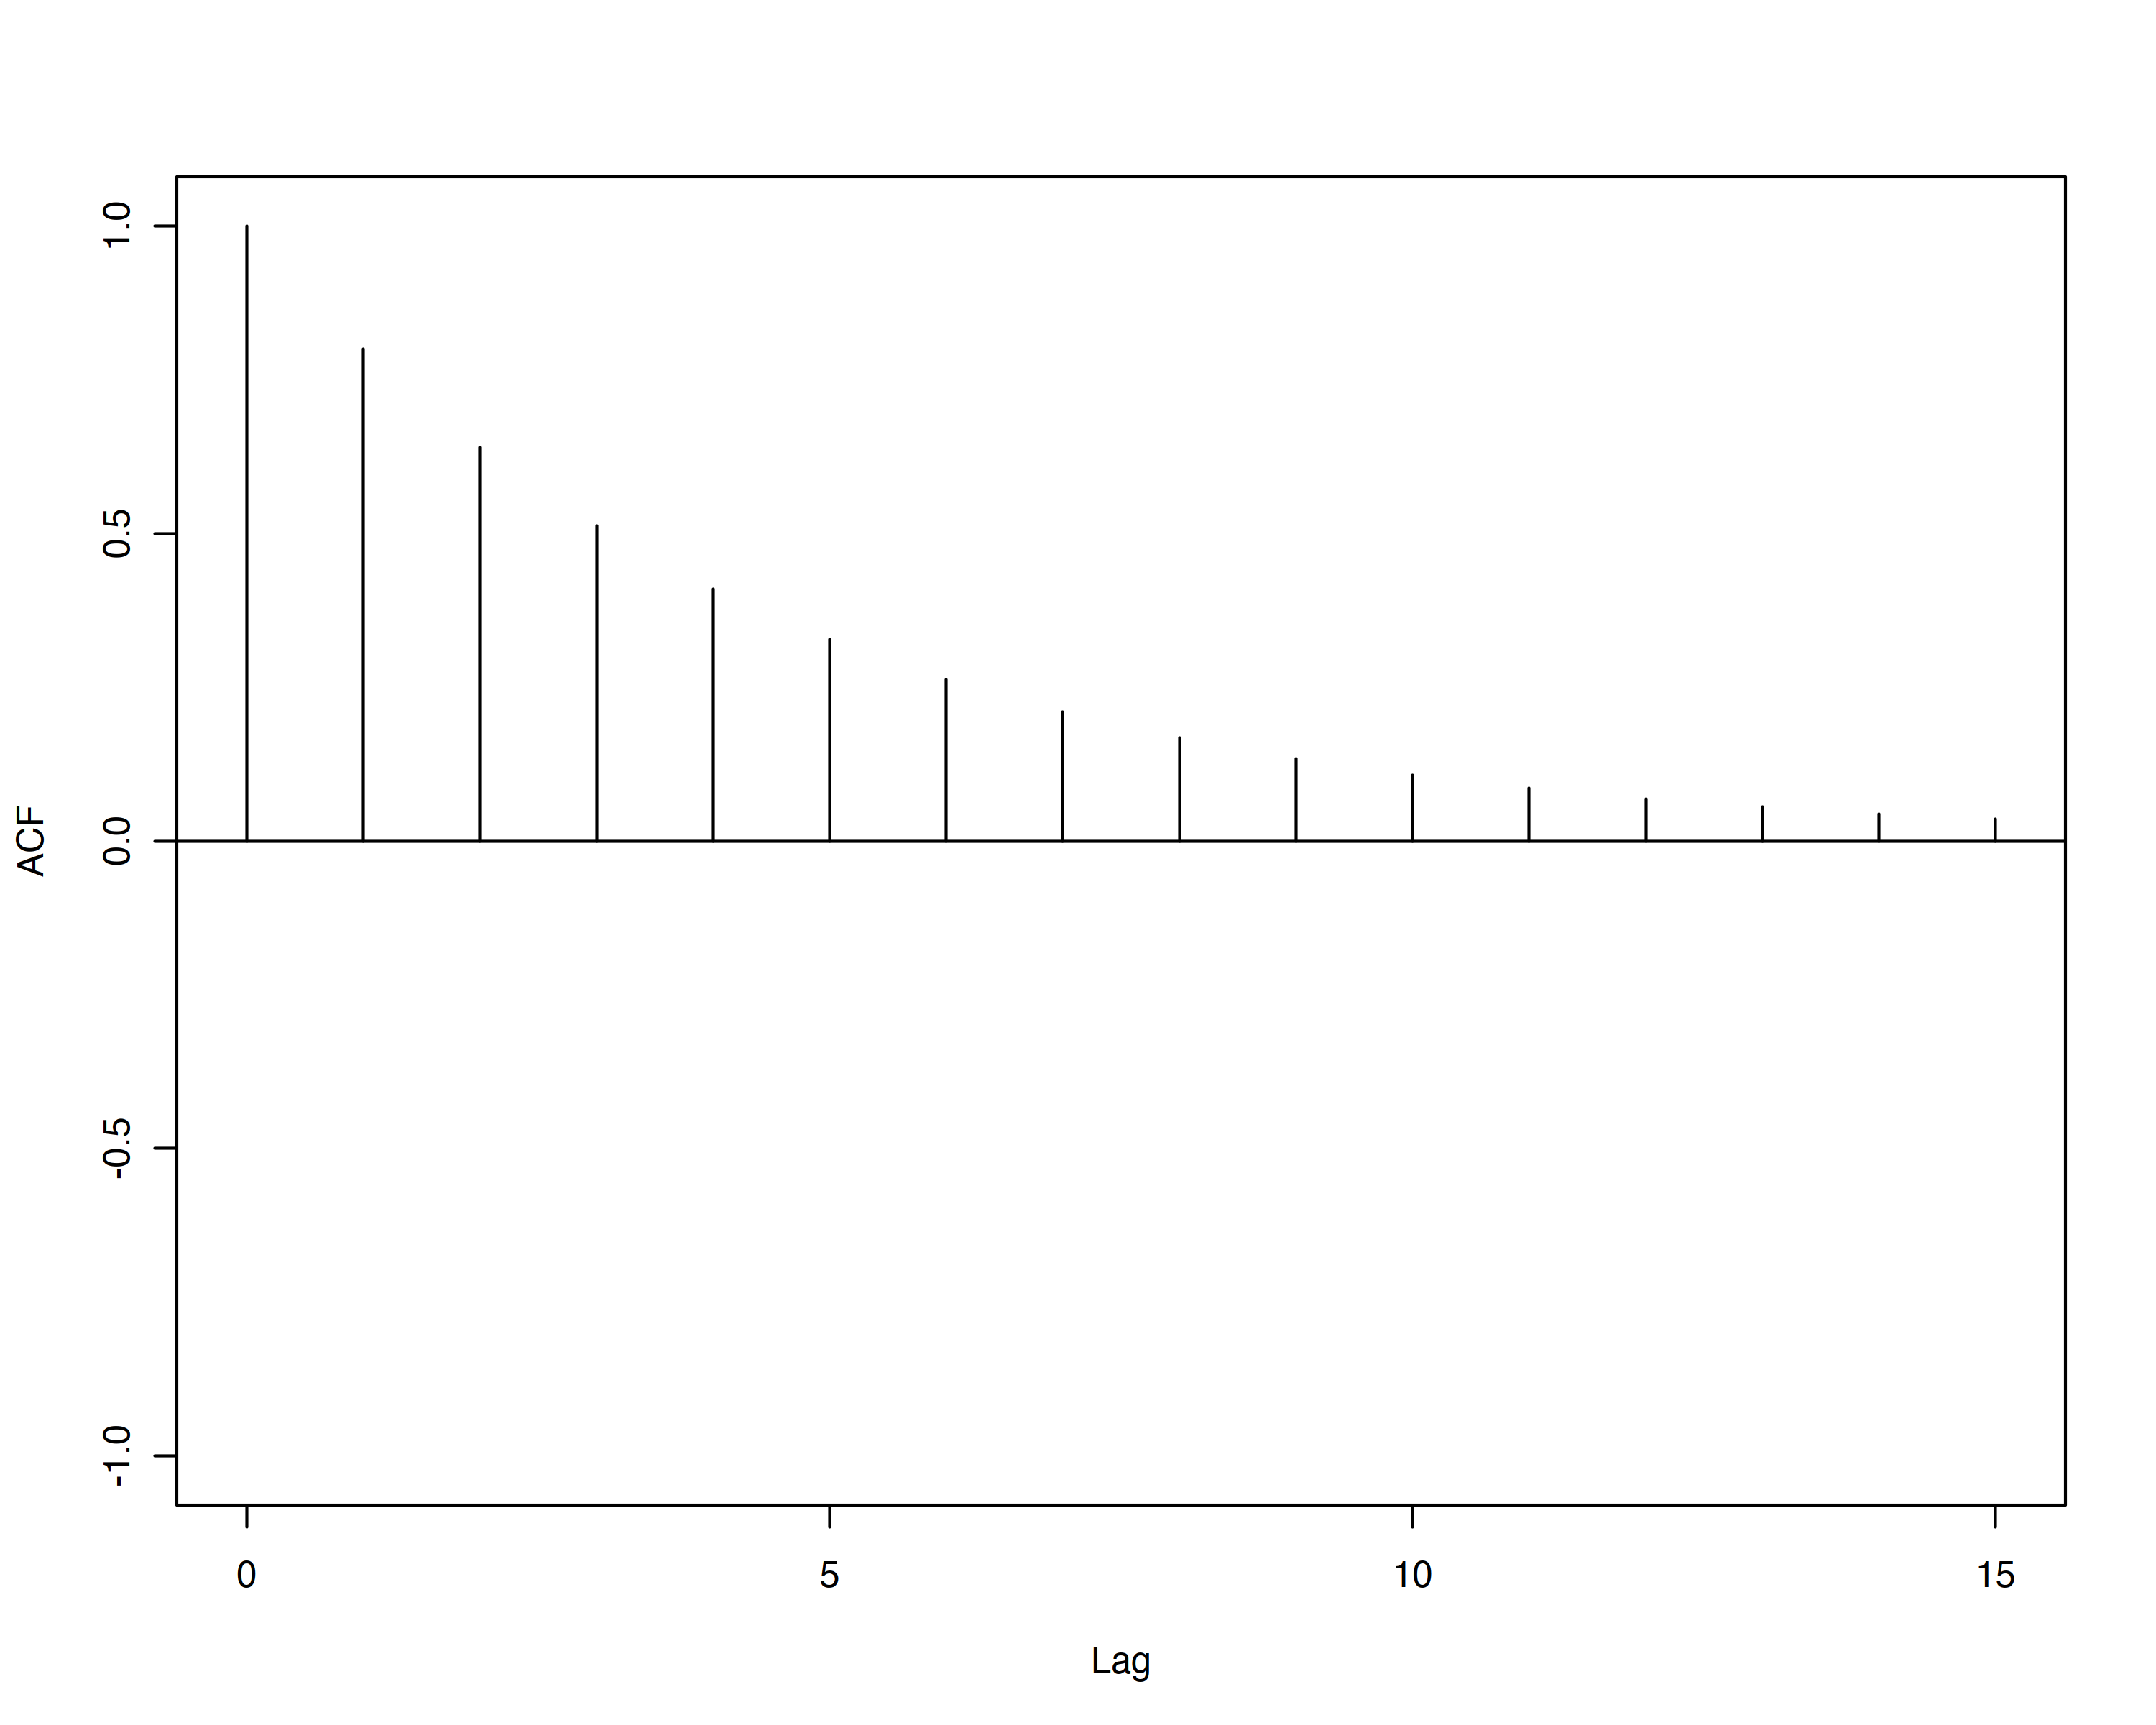

In [95]:
# 优化变量命名与代码格式
lags <- 0:15
acf_values <- 0.8^lags

# 调整画布大小
options(repr.plot.width = 10, repr.plot.height = 8)
# 调整分辨率
options(repr.plot.res = 300)

plot(
  lags, acf_values,
  type = "h",
  xlab = "Lag",
  ylab = "ACF",
  ylim = c(-1, 1)
)
abline(h = 0)

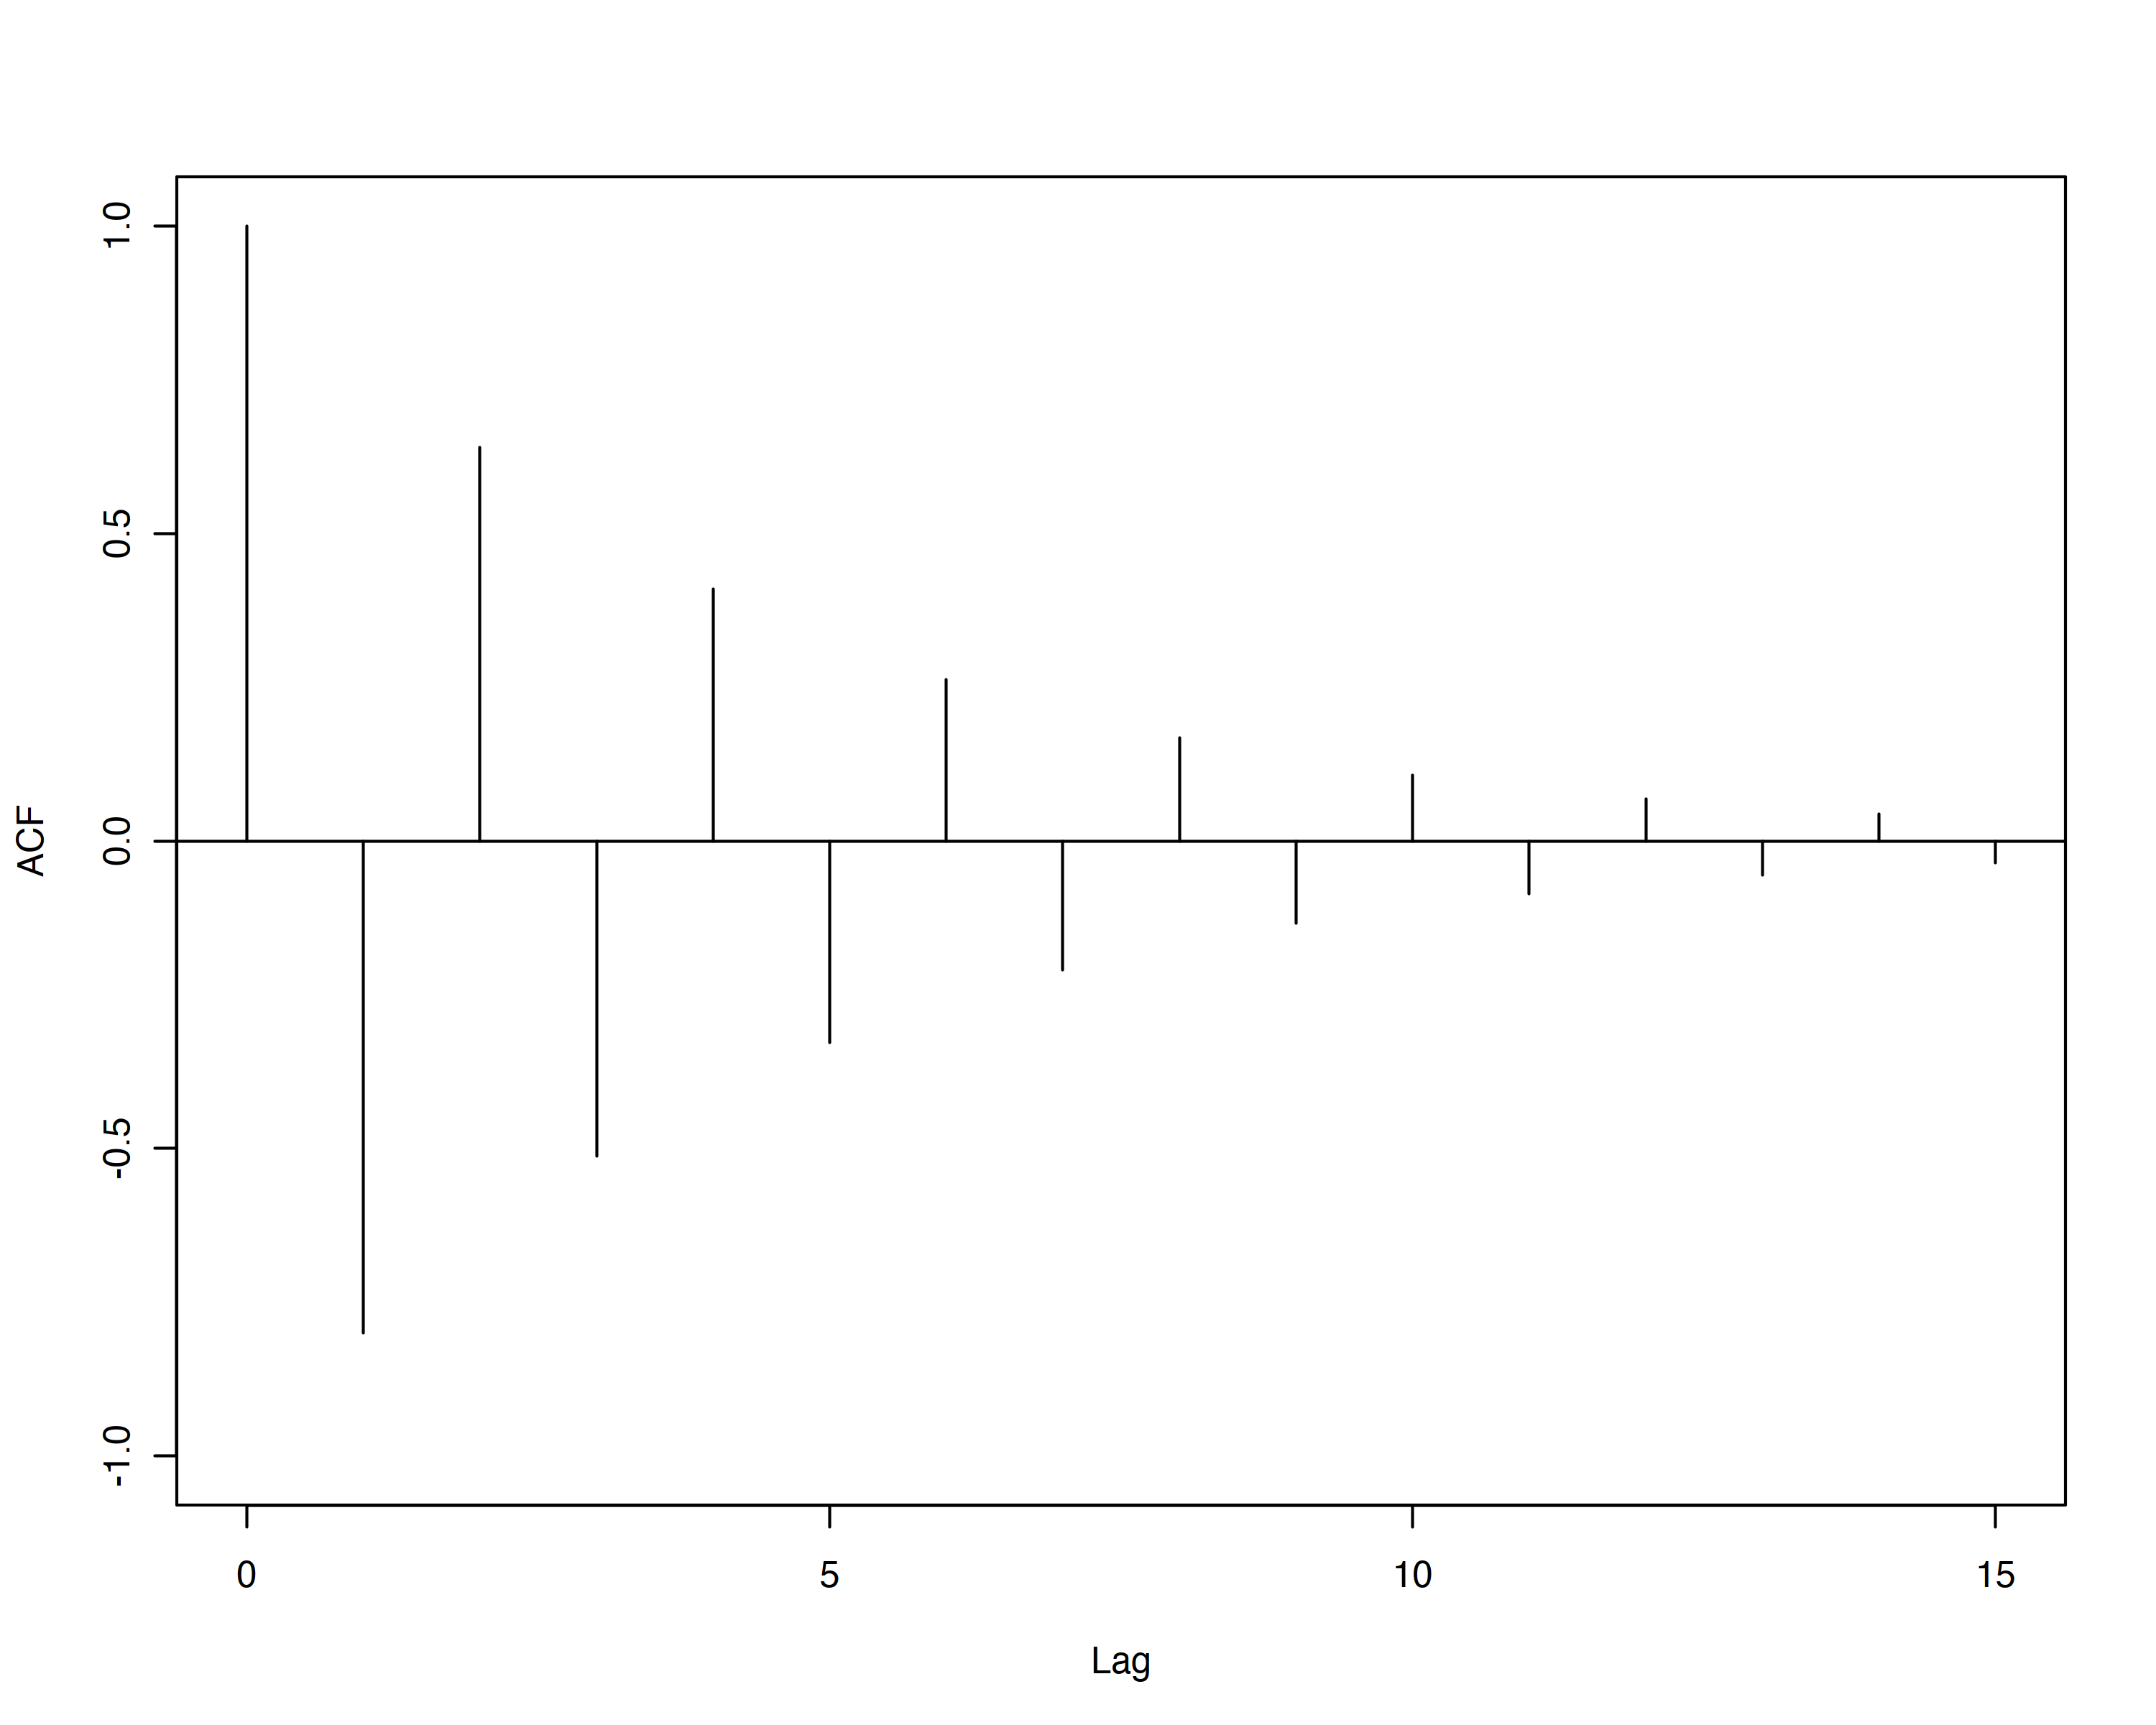

In [96]:
lags_neg <- 0:15
acf_values_neg <- (-0.8)^lags_neg

plot(
  lags_neg, acf_values_neg,
  type = "h",
  xlab = "Lag",
  ylab = "ACF",
  ylim = c(-1, 1)
)
abline(h = 0)

In [97]:
library(tidyverse)

# 读取数据并创建时间序列对象
da <- read_table(
  "./data/q-gnp4710.txt",
  col_types = cols(.default = col_double())
)
gnp <- ts(
  da[["VALUE"]],
  start = c(1947, 1),
  frequency = 4
)

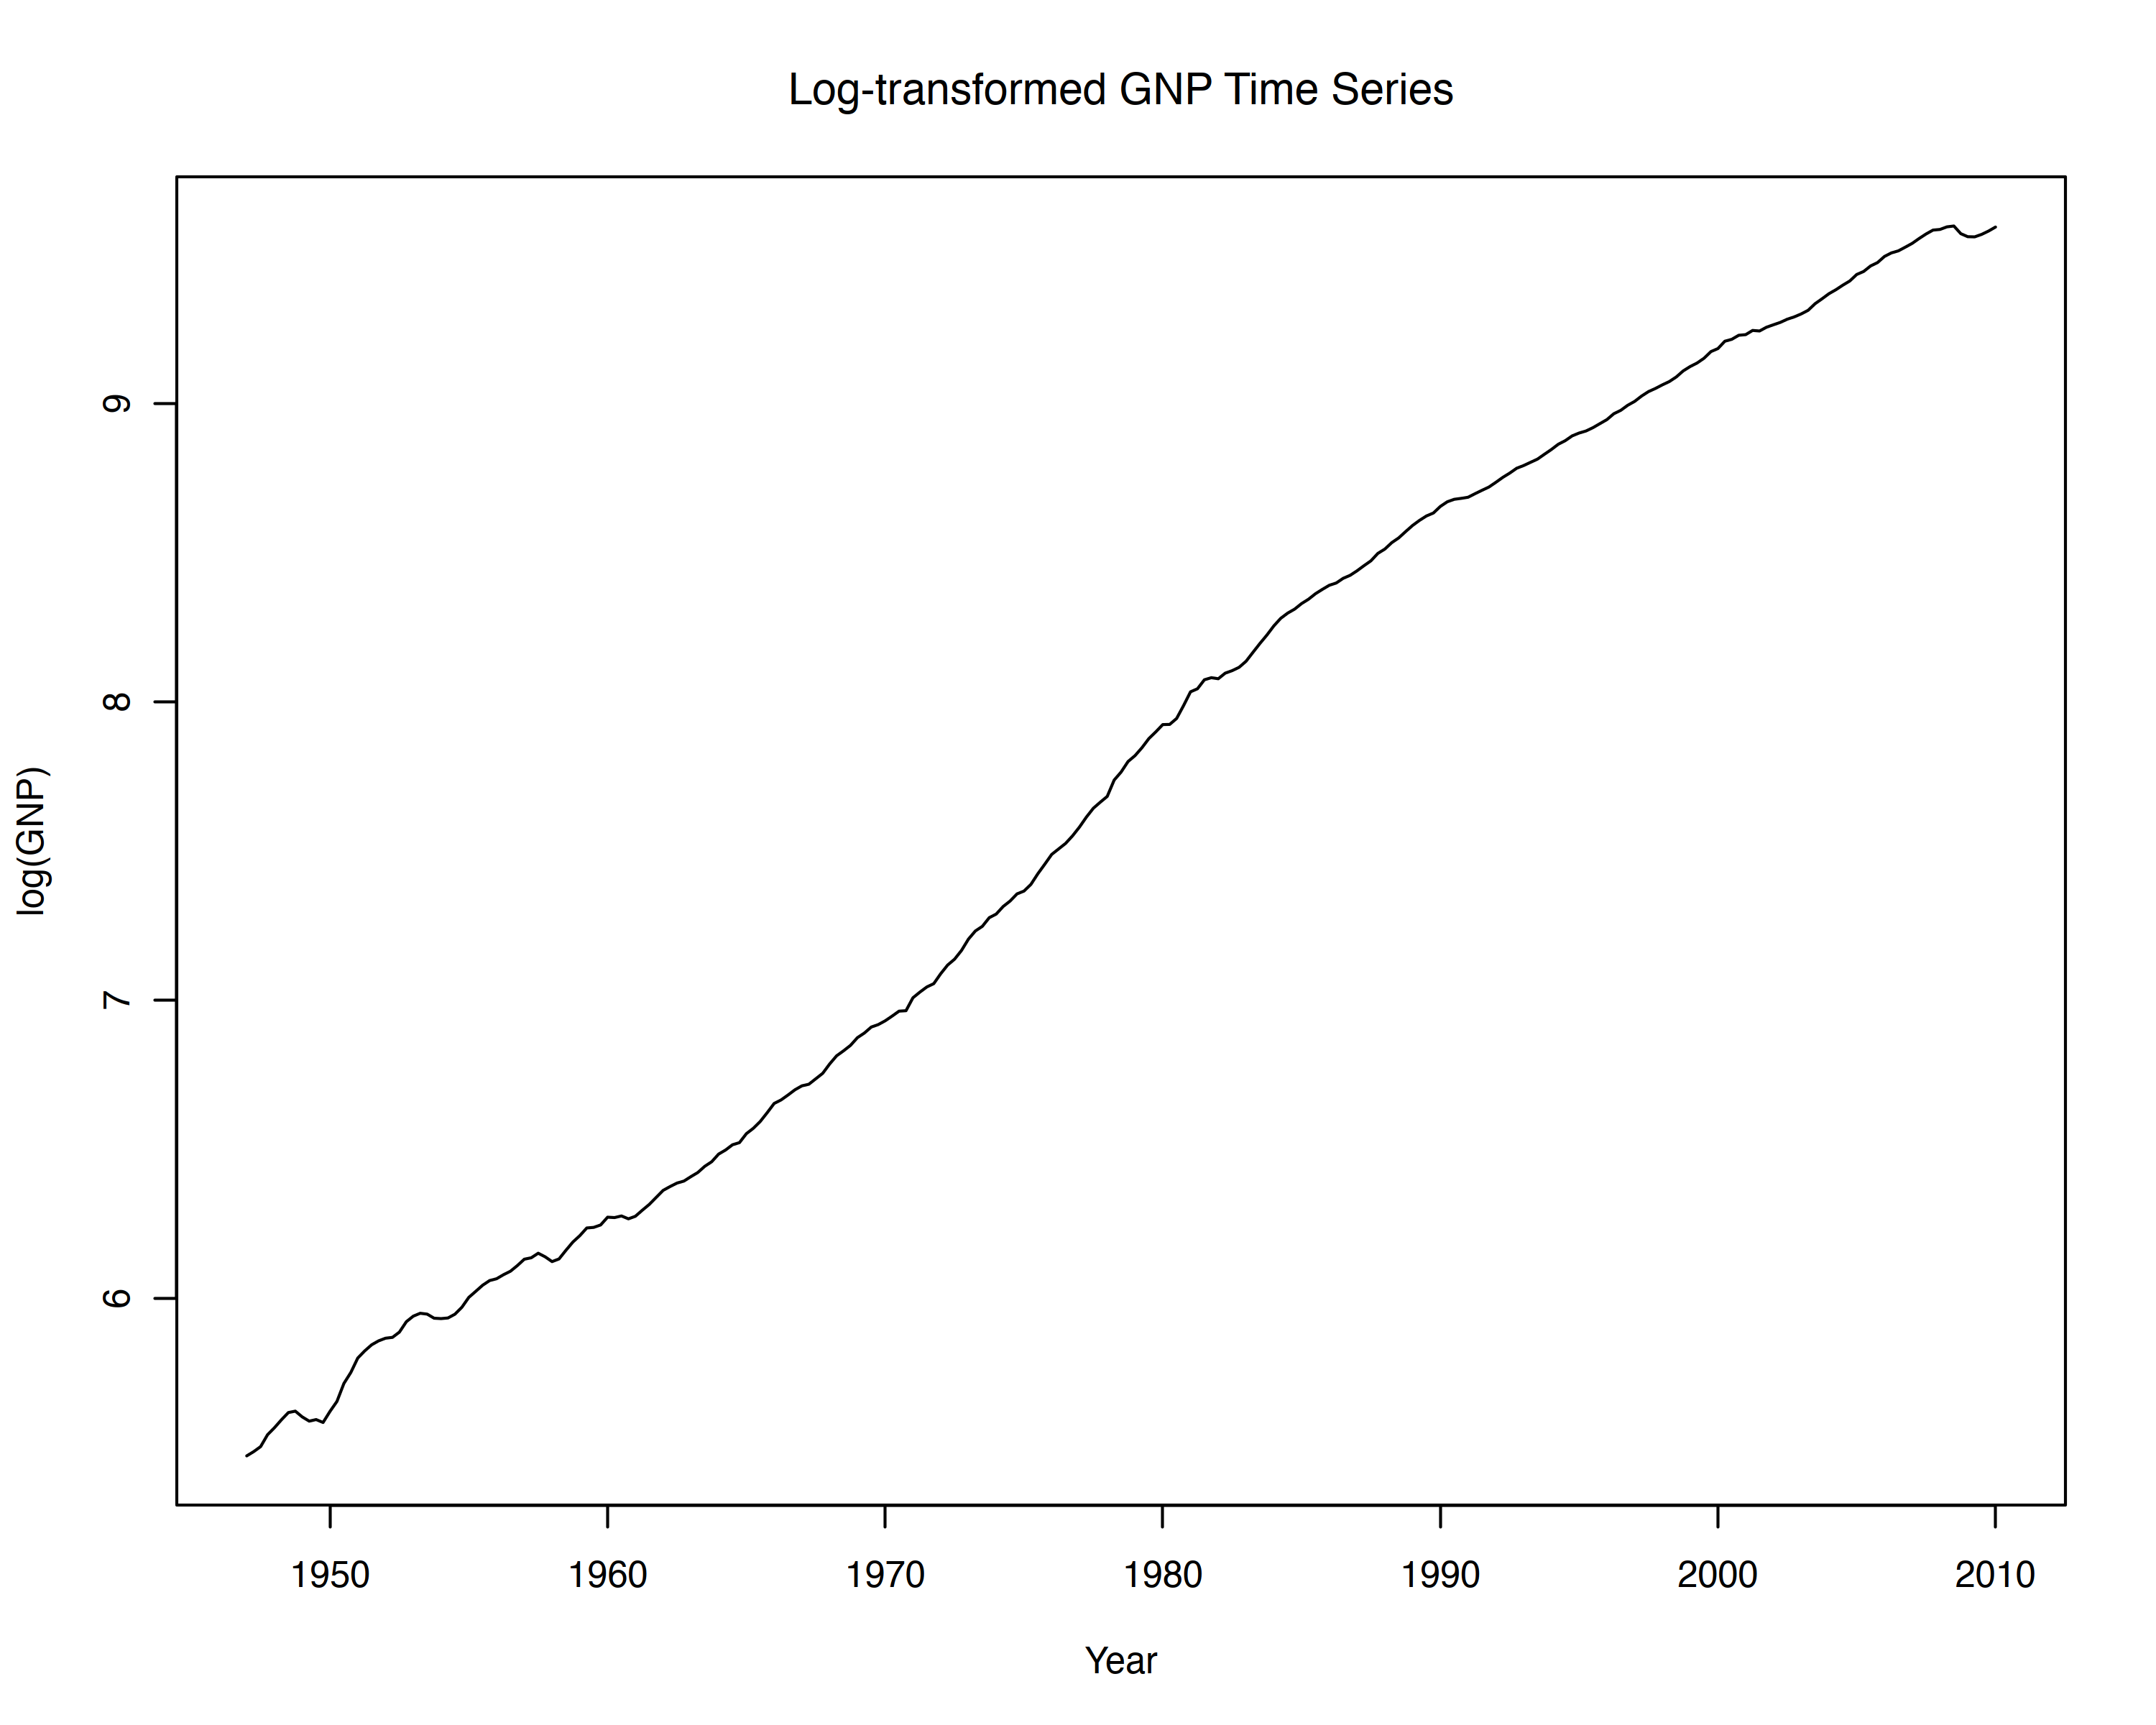

In [98]:
plot(
  log(gnp),
  xlab = "Year",
  ylab = "log(GNP)",
  main = "Log-transformed GNP Time Series"
)

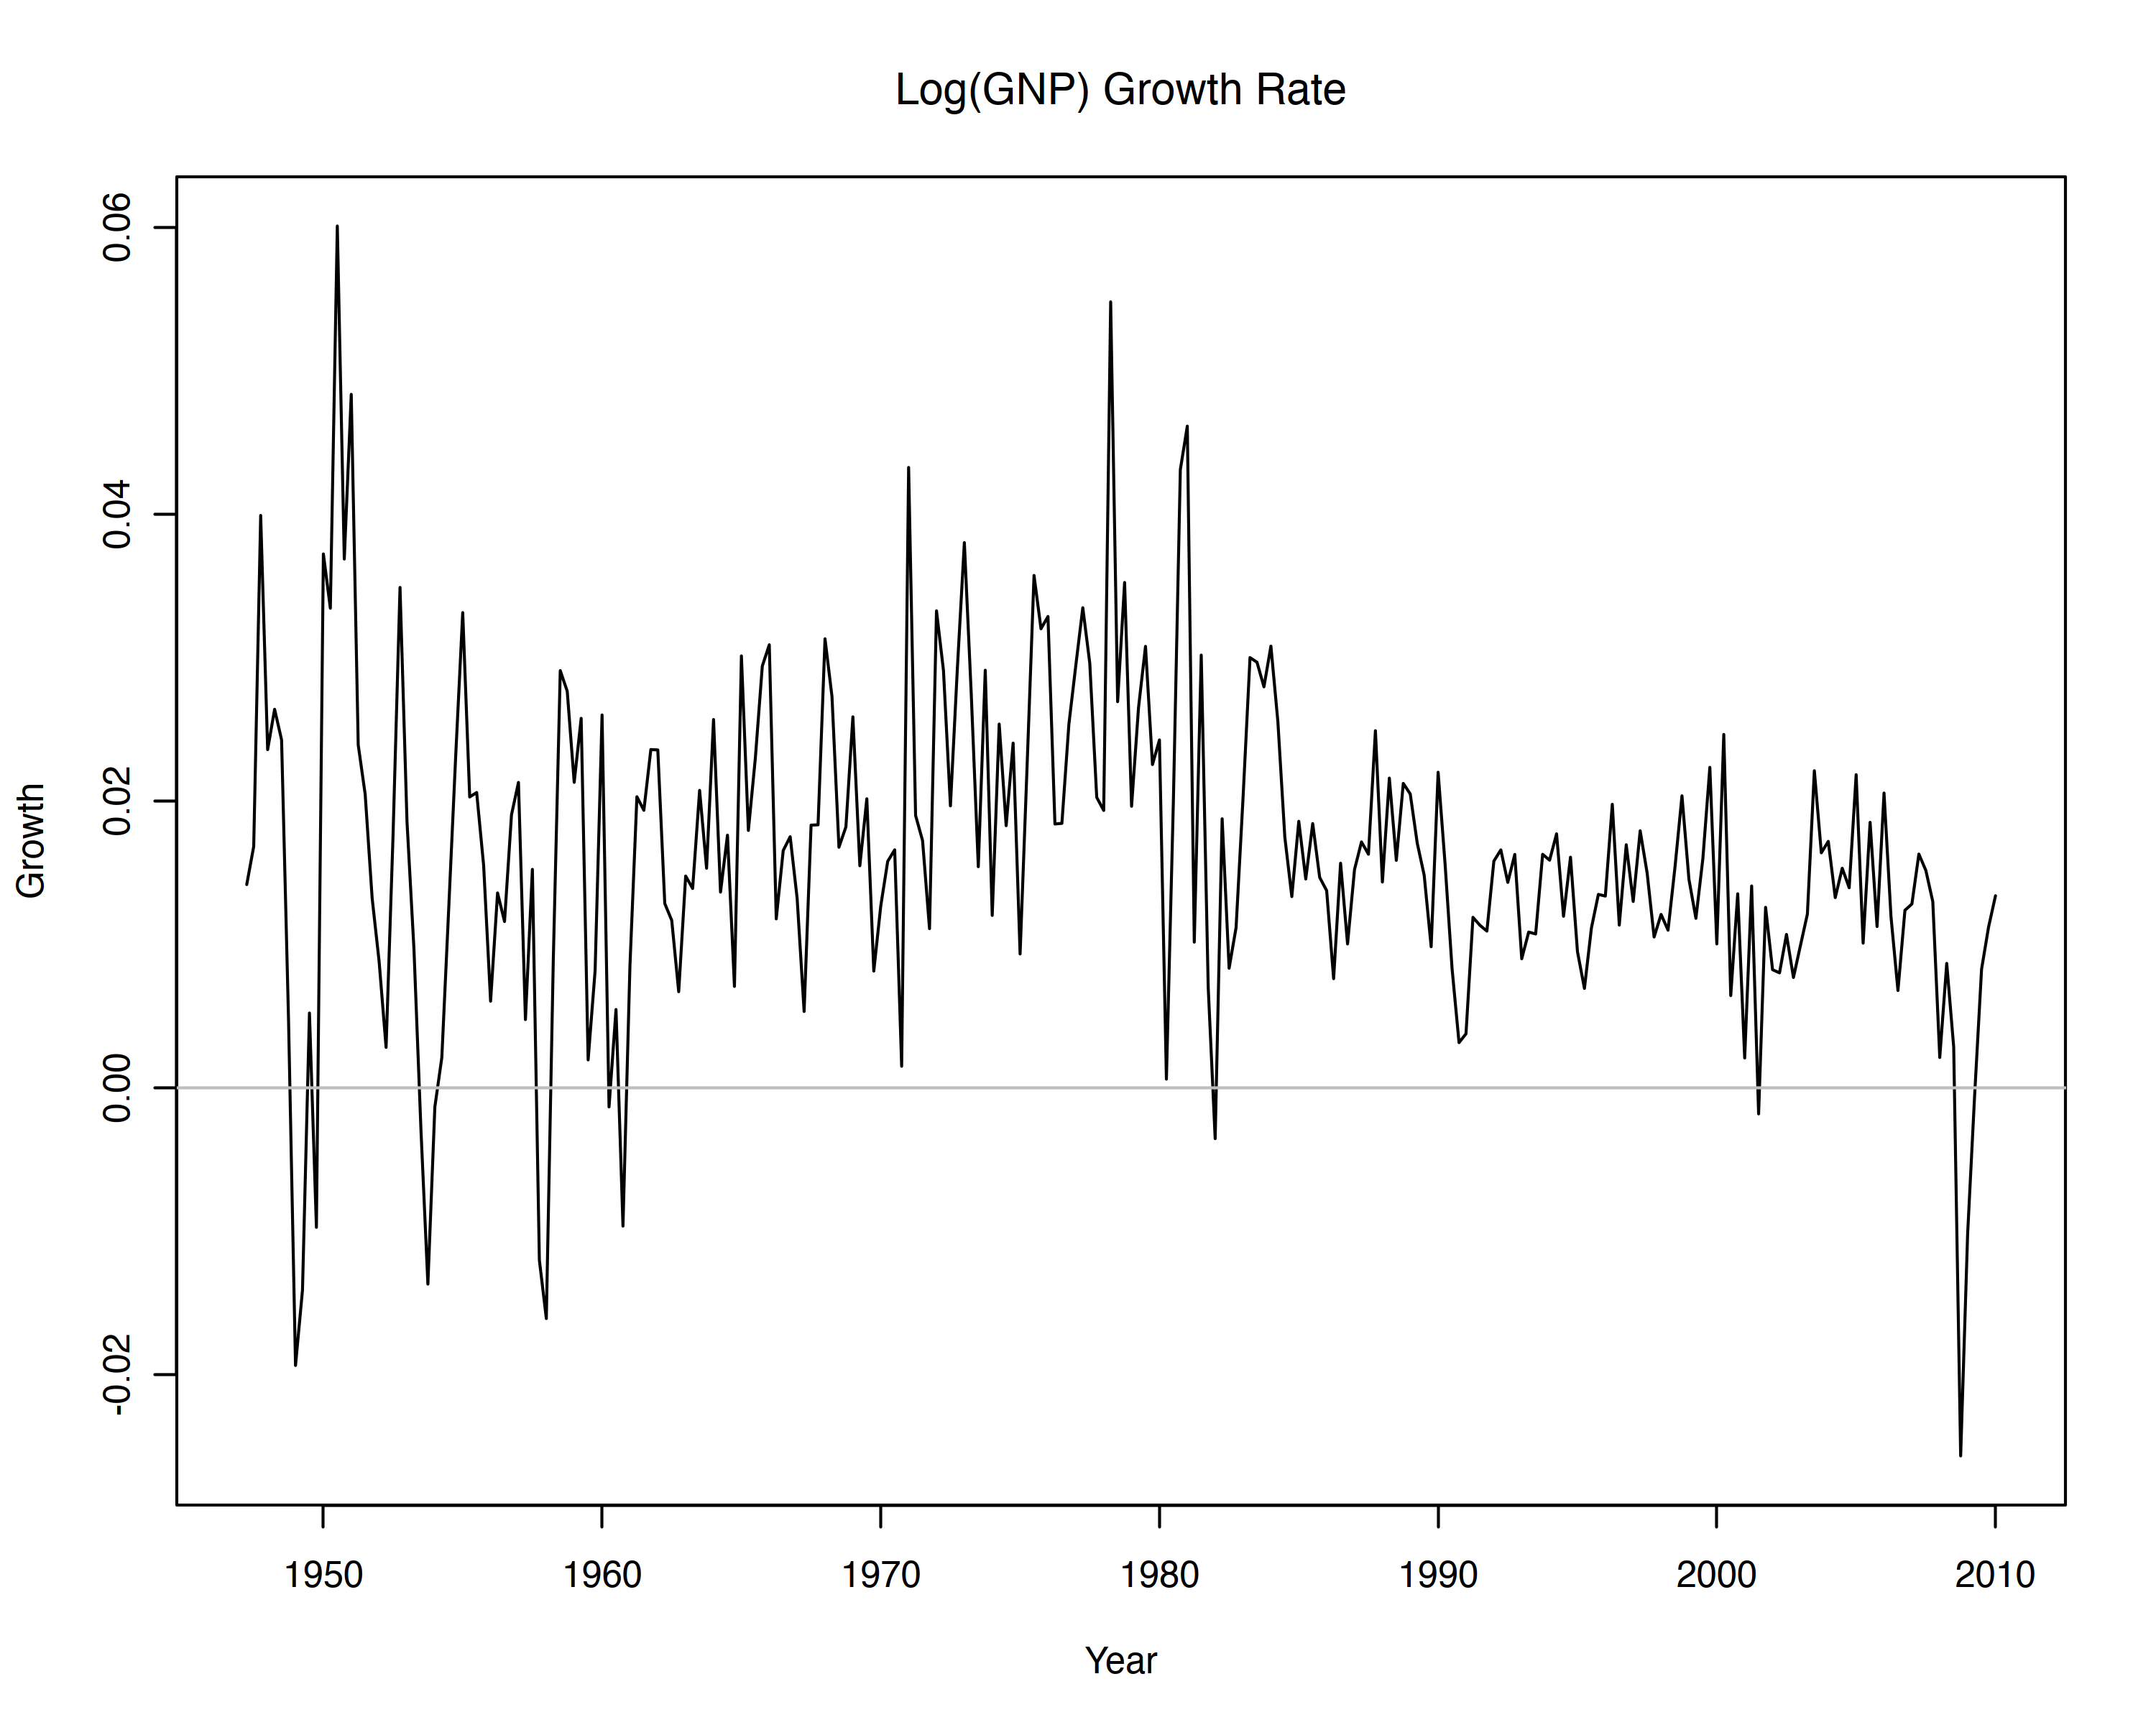

In [99]:
# 计算对数增长率并绘图，优化代码格式
rate <- diff(log(gnp))
plot(
  rate,
  xlab = "Year",
  ylab = "Growth",
  main = "Log(GNP) Growth Rate"
)
abline(h = 0, col = "gray")

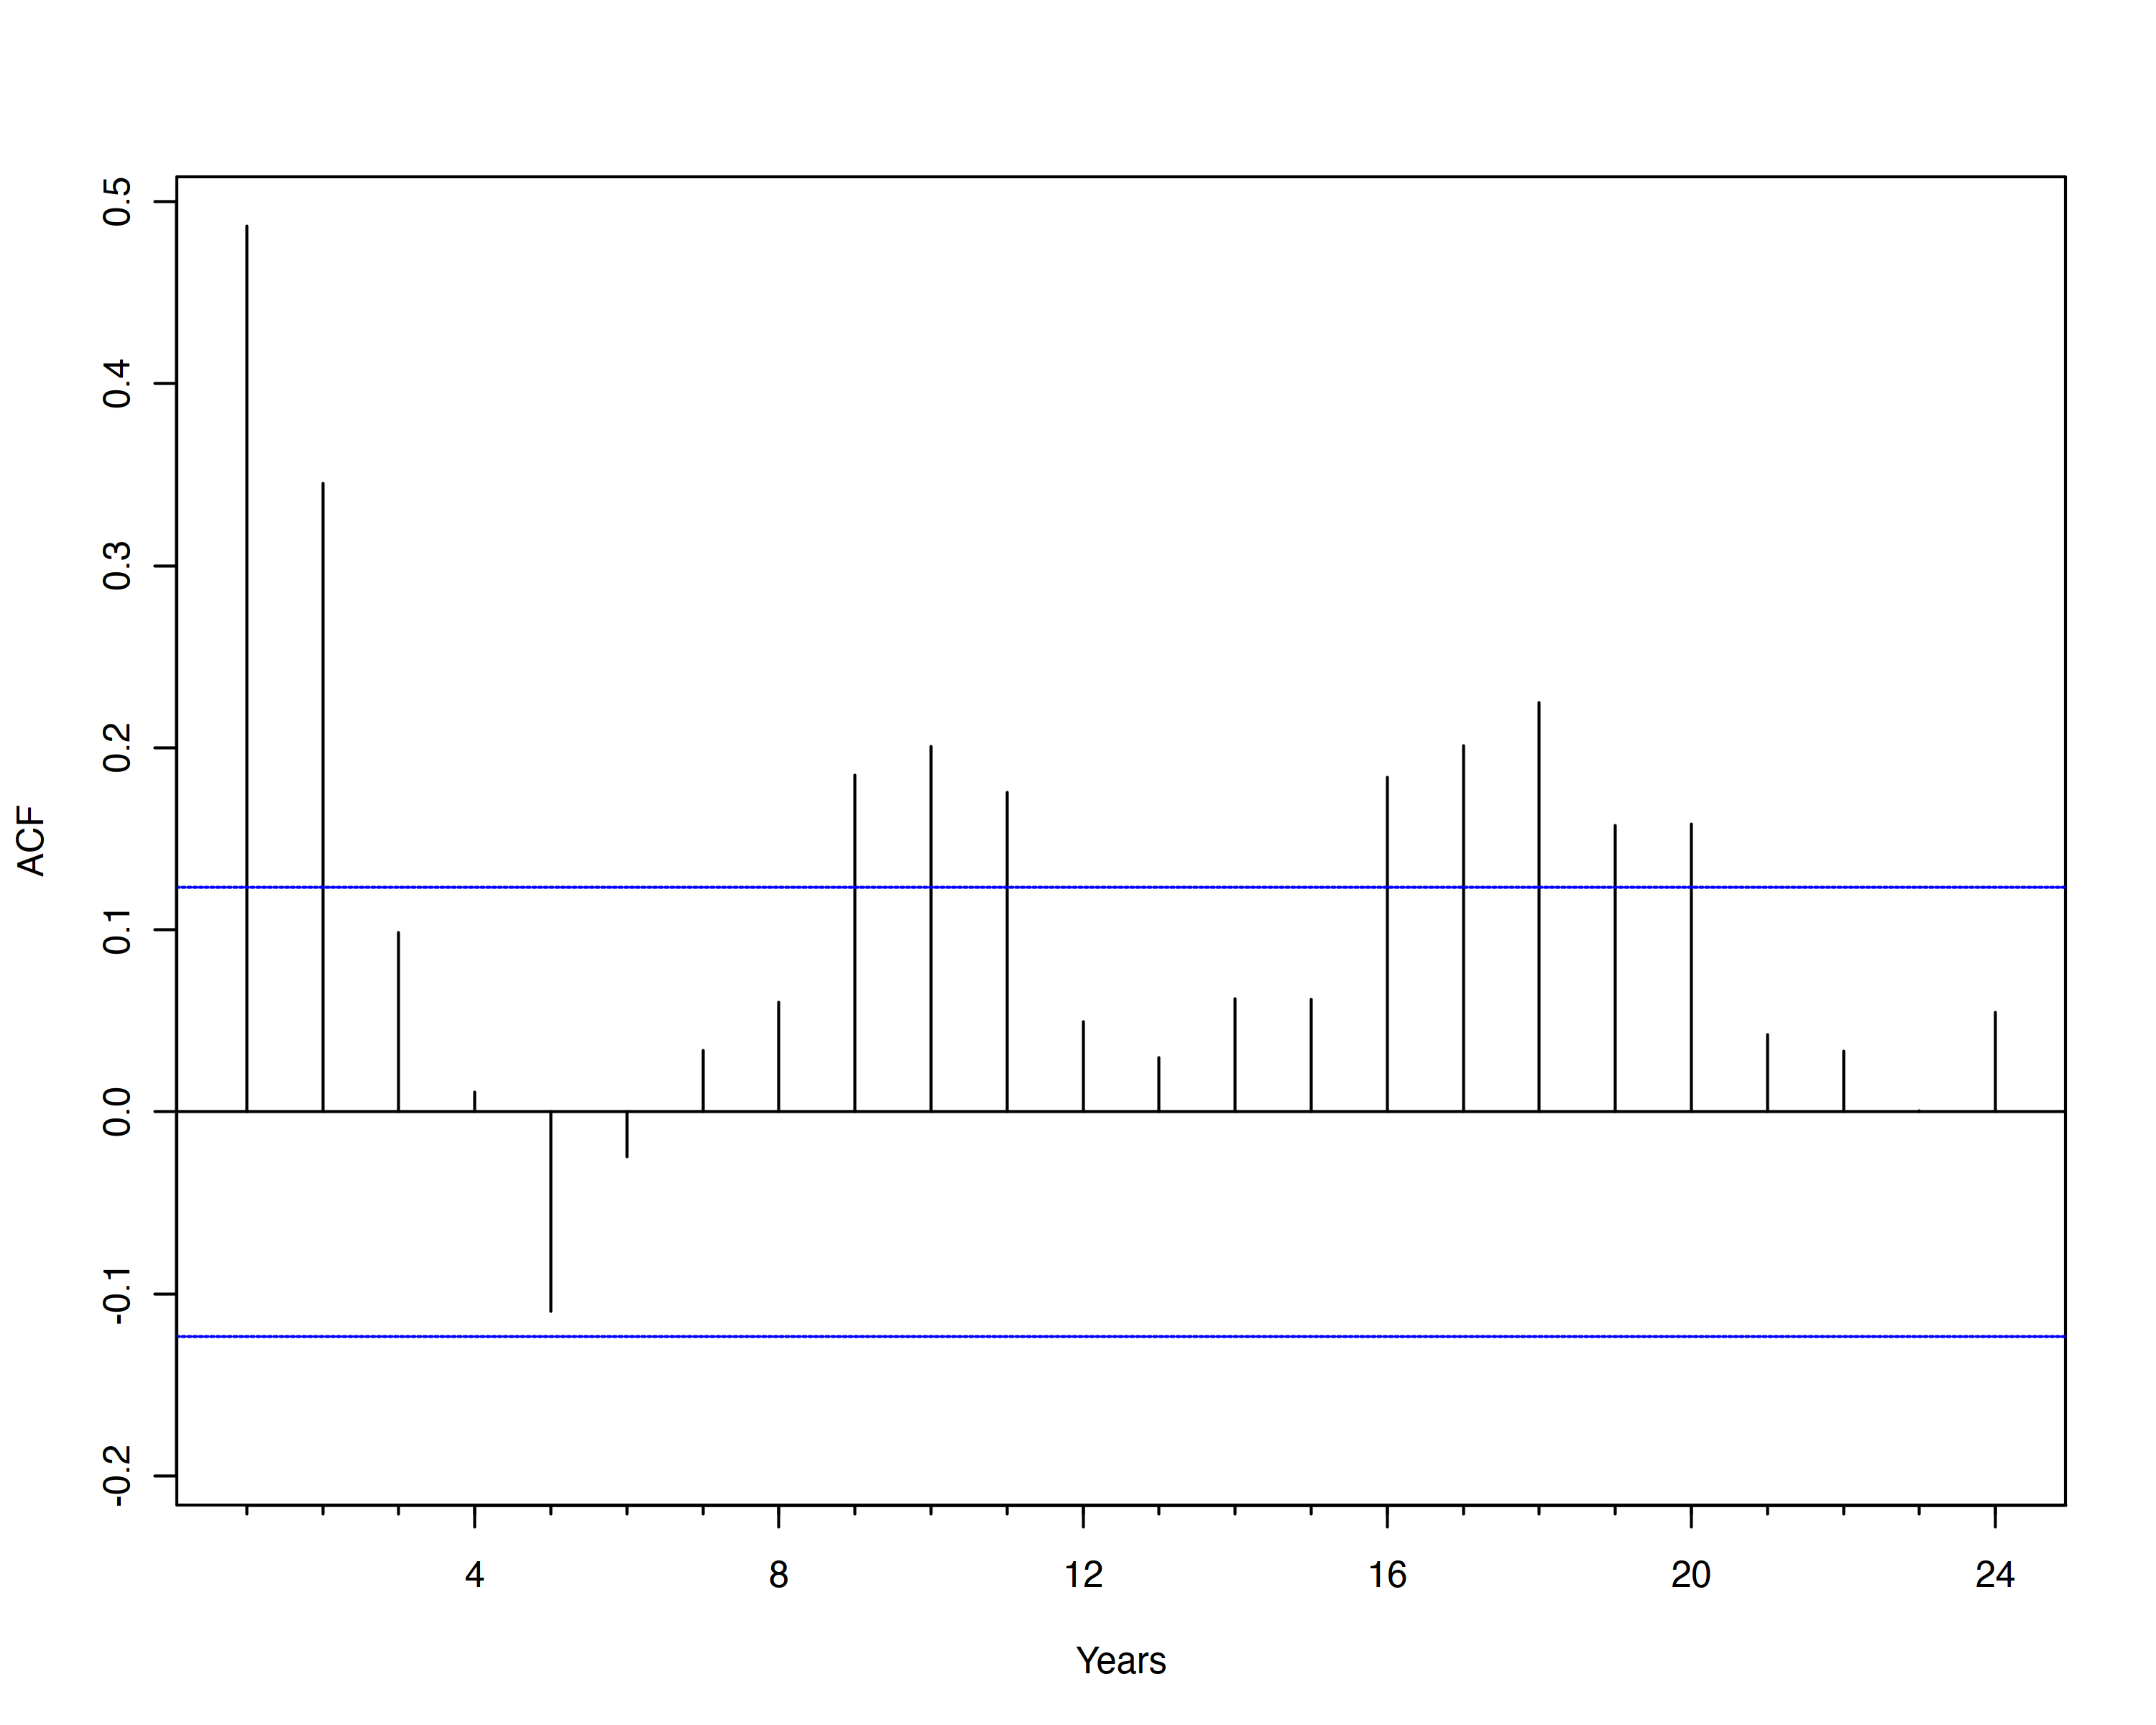

In [100]:
forecast::Acf(rate, xlab = "Years", main = "")

In [101]:
roots <- polyroot(c(1, -0.438, -0.206, 0.156))

roots

[1]  1.614790+8.661682e-01i -1.909068+1.233751e-16i  1.614790-8.661682e-01i

In [102]:
abs(roots)

[1] 1.832429 1.909068 1.832429

In [103]:
2 * pi / Arg(roots[1])

# 12.7619012271034

[1] 12.7619

In [104]:
# 优化代码格式，读取数据并创建时间序列对象
d <- read_table(
  "./data/m-ibm3dx2608.txt",
  col_types = cols(
    .default = col_double(),
    date = col_date(format = "%Y%m%d")
  )
)

library(xts)
ibmind <- xts(
  as.matrix(d[, -1]),
  order.by = d$date
)
tclass(ibmind) <- "yearmon"

vw <- ts(
  coredata(ibmind)[, "vwrtn"],
  start = c(1926, 1),
  frequency = 12
)

head(ibmind)

# ibmrtn     vwrtn     ewrtn     sprtn
# Jan 1926 -0.010381  0.000724  0.023174  0.022472
# Feb 1926 -0.024476 -0.033374 -0.053510 -0.043956
# Mar 1926 -0.115591 -0.064341 -0.096824 -0.059113
# Apr 1926  0.089783  0.038358  0.032946  0.022688
# May 1926  0.036932  0.012172  0.001035  0.007679
# Jun 1926  0.068493  0.056888  0.050487  0.043184

            ibmrtn     vwrtn     ewrtn     sprtn
Jan 1926 -0.010381  0.000724  0.023174  0.022472
Feb 1926 -0.024476 -0.033374 -0.053510 -0.043956
Mar 1926 -0.115591 -0.064341 -0.096824 -0.059113
Apr 1926  0.089783  0.038358  0.032946  0.022688
May 1926  0.036932  0.012172  0.001035  0.007679
Jun 1926  0.068493  0.056888  0.050487  0.043184

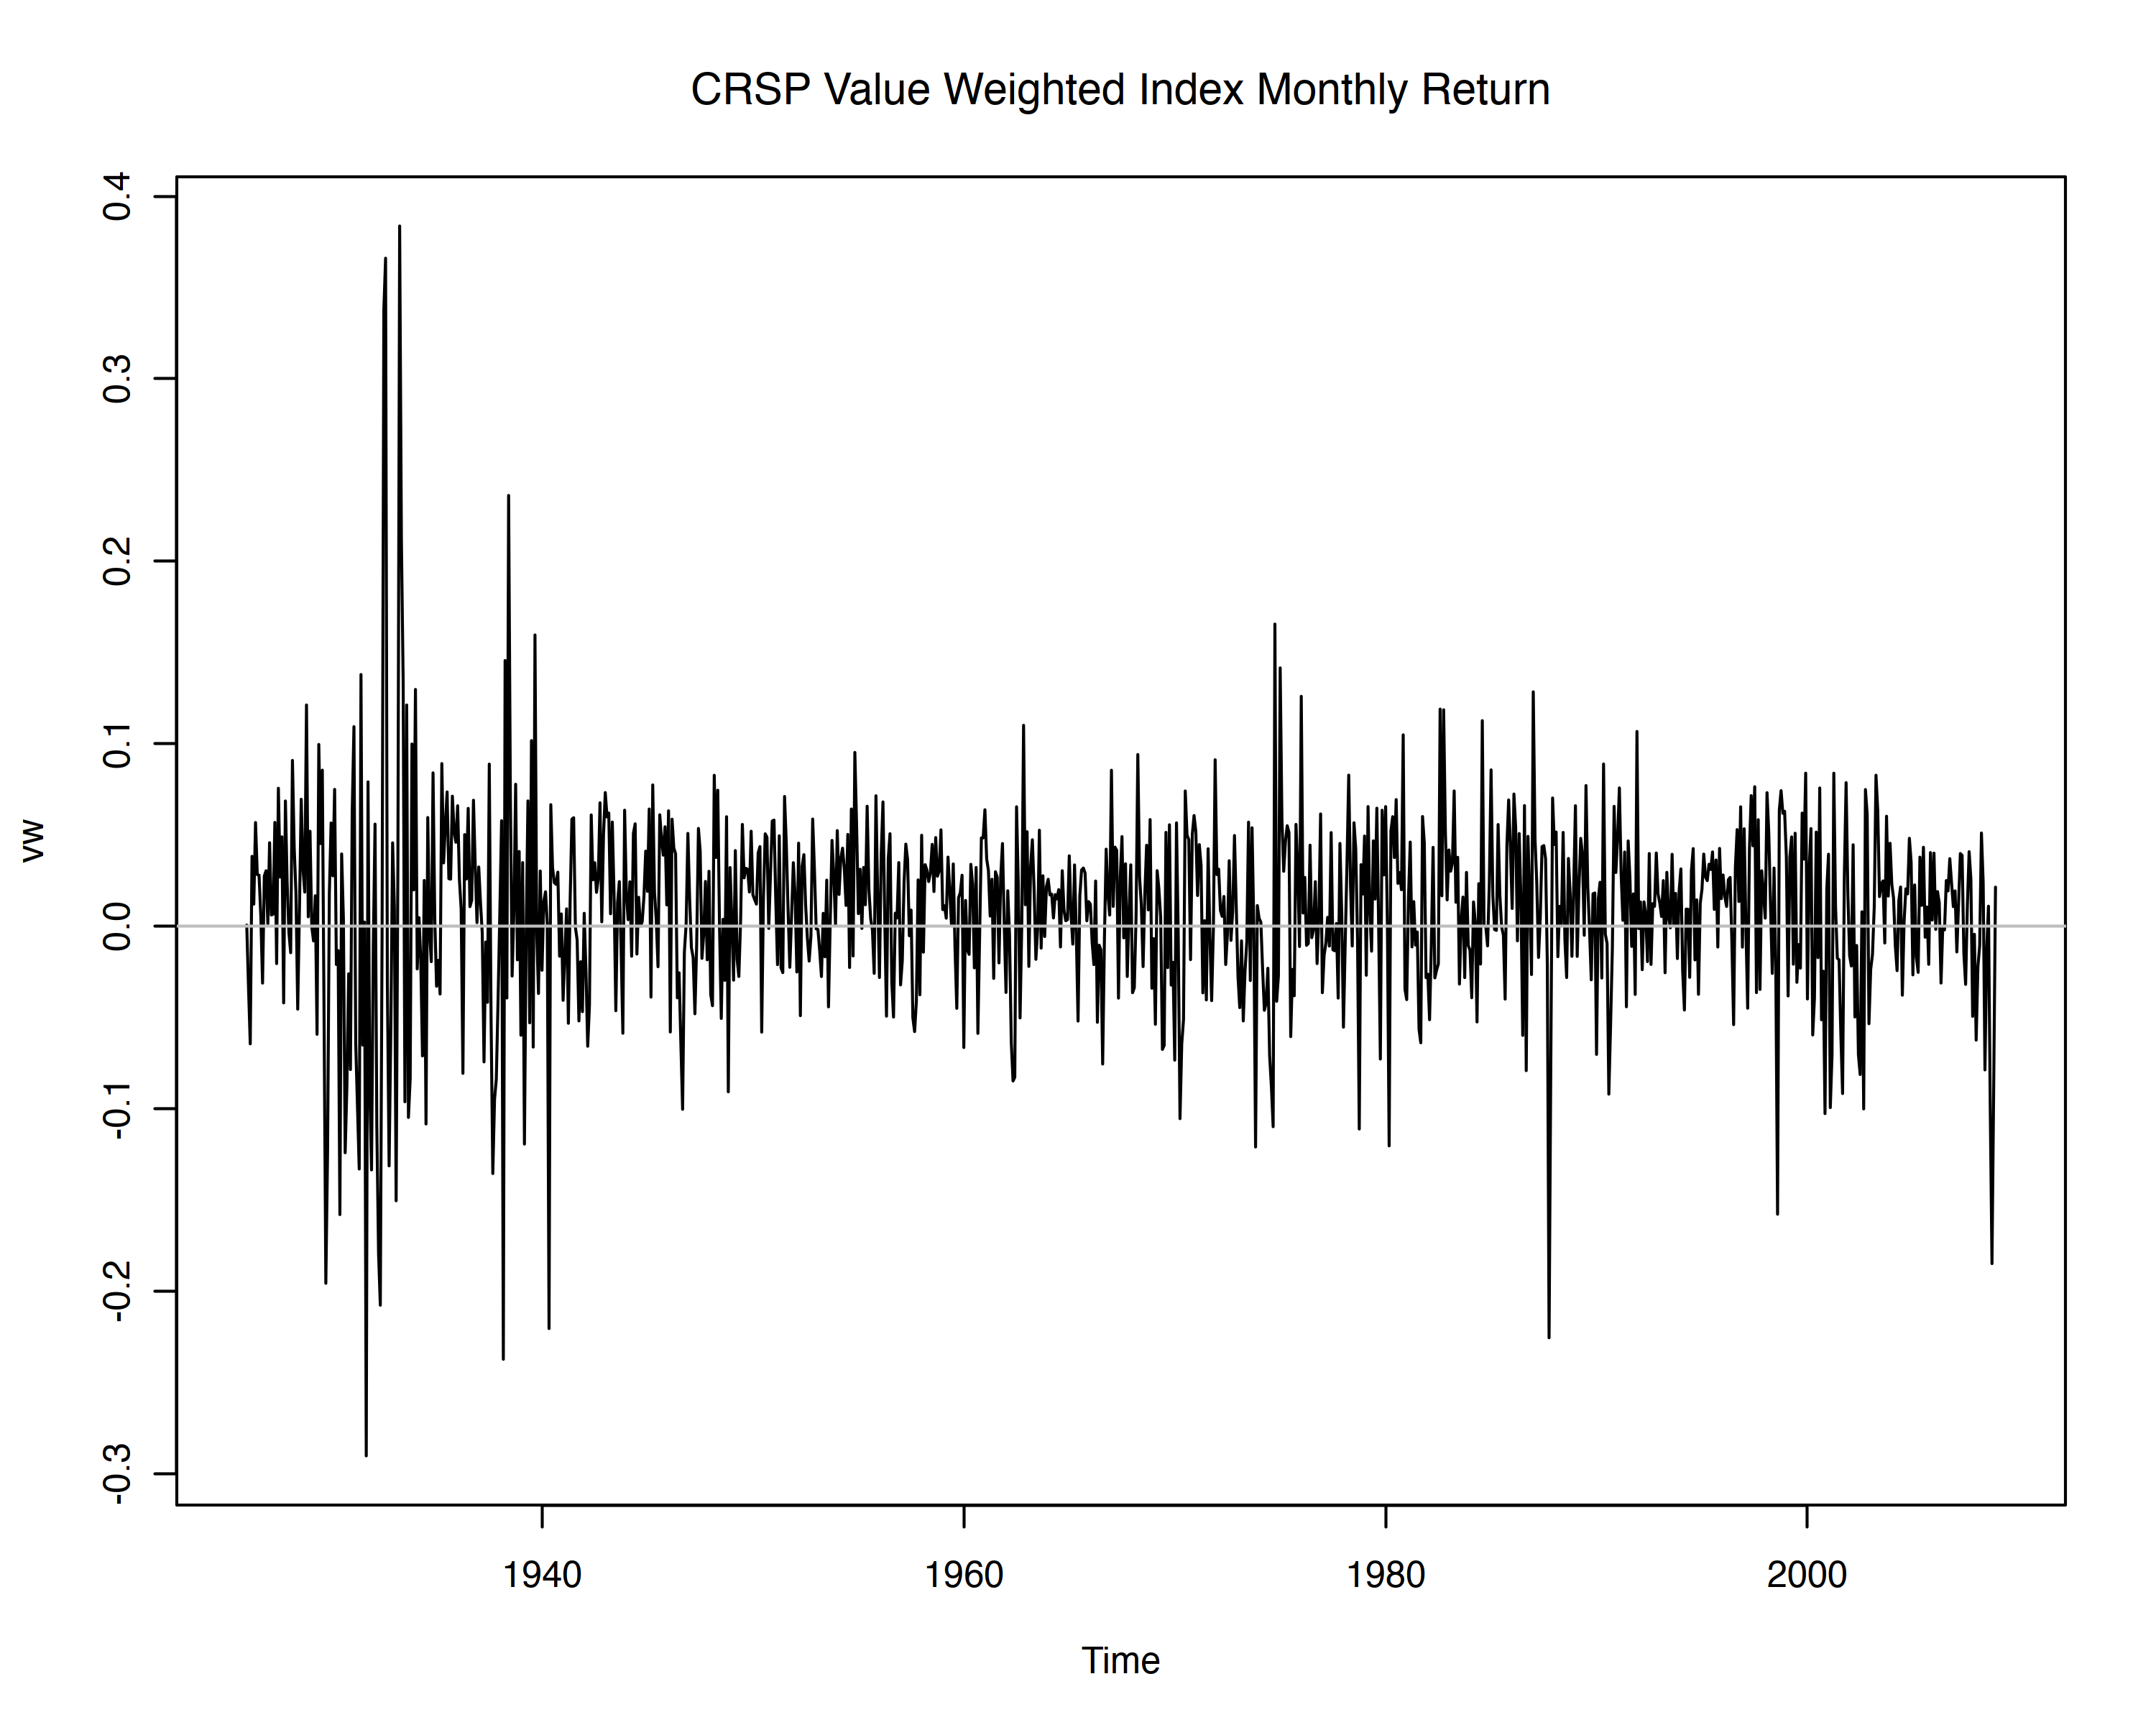

In [105]:
plot(vw, main = "CRSP Value Weighted Index Monthly Return")
abline(h = 0, col = "gray")

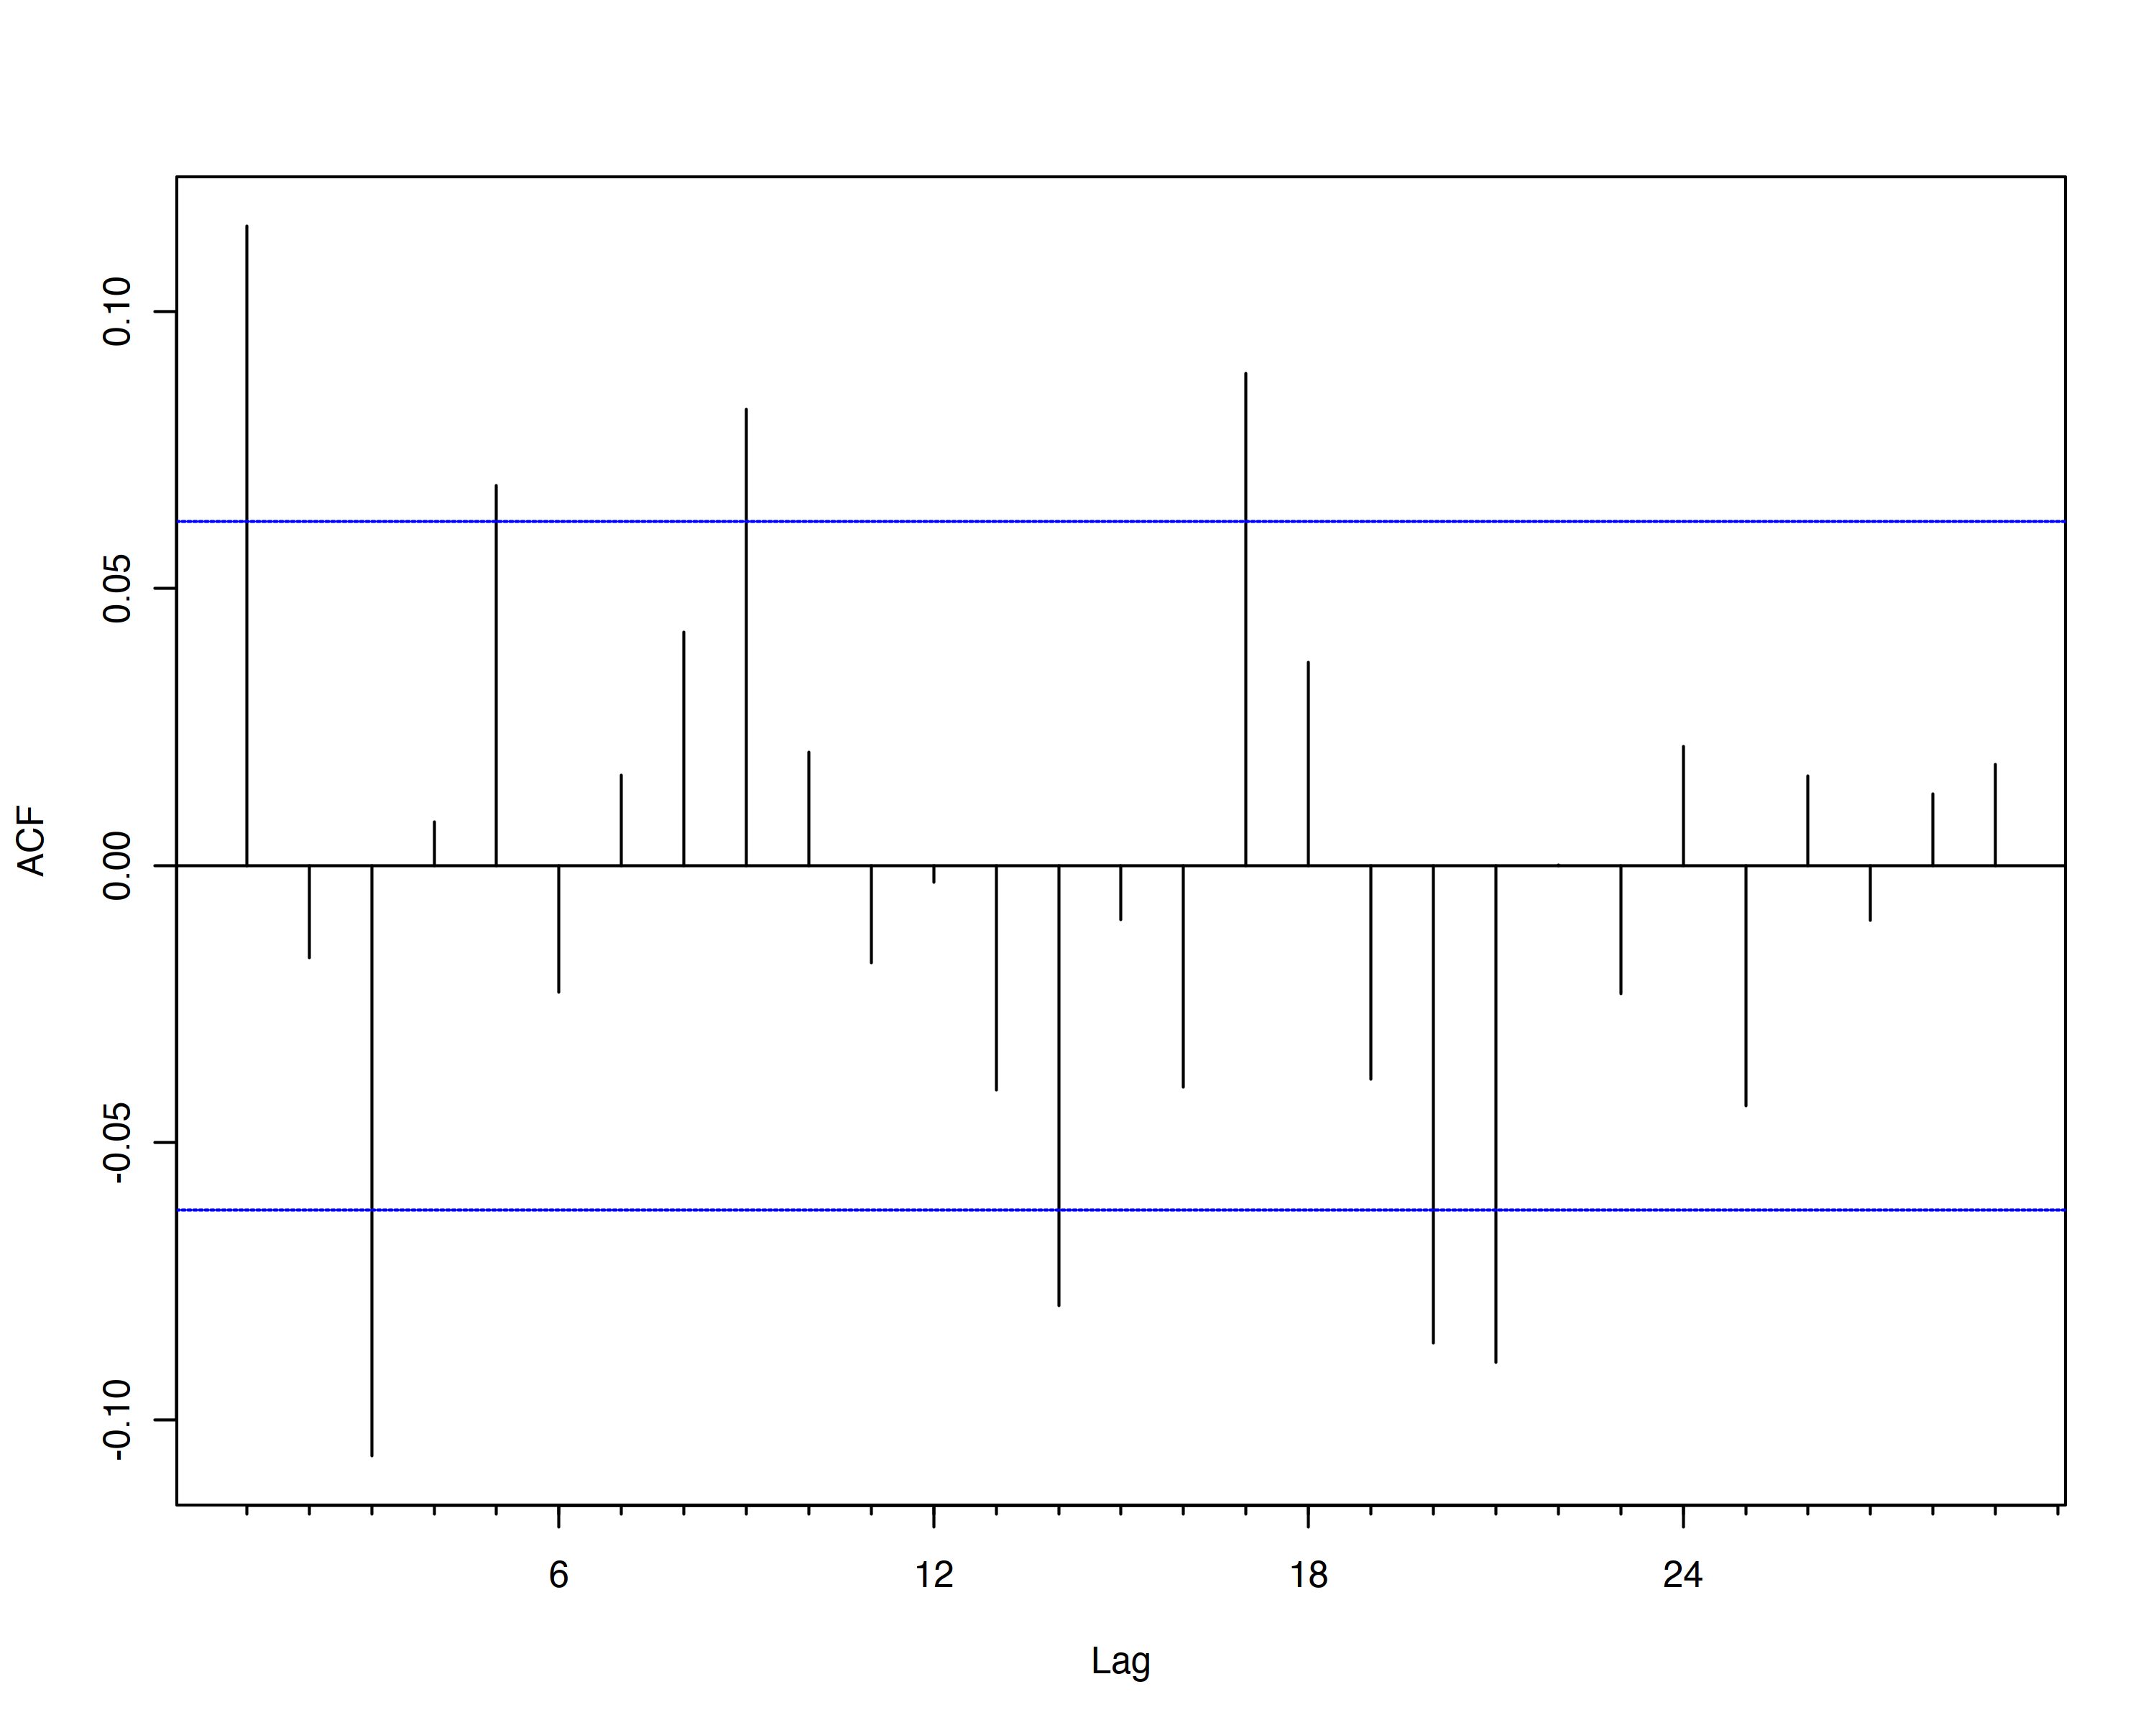

In [106]:
forecast::Acf(vw, main = "")

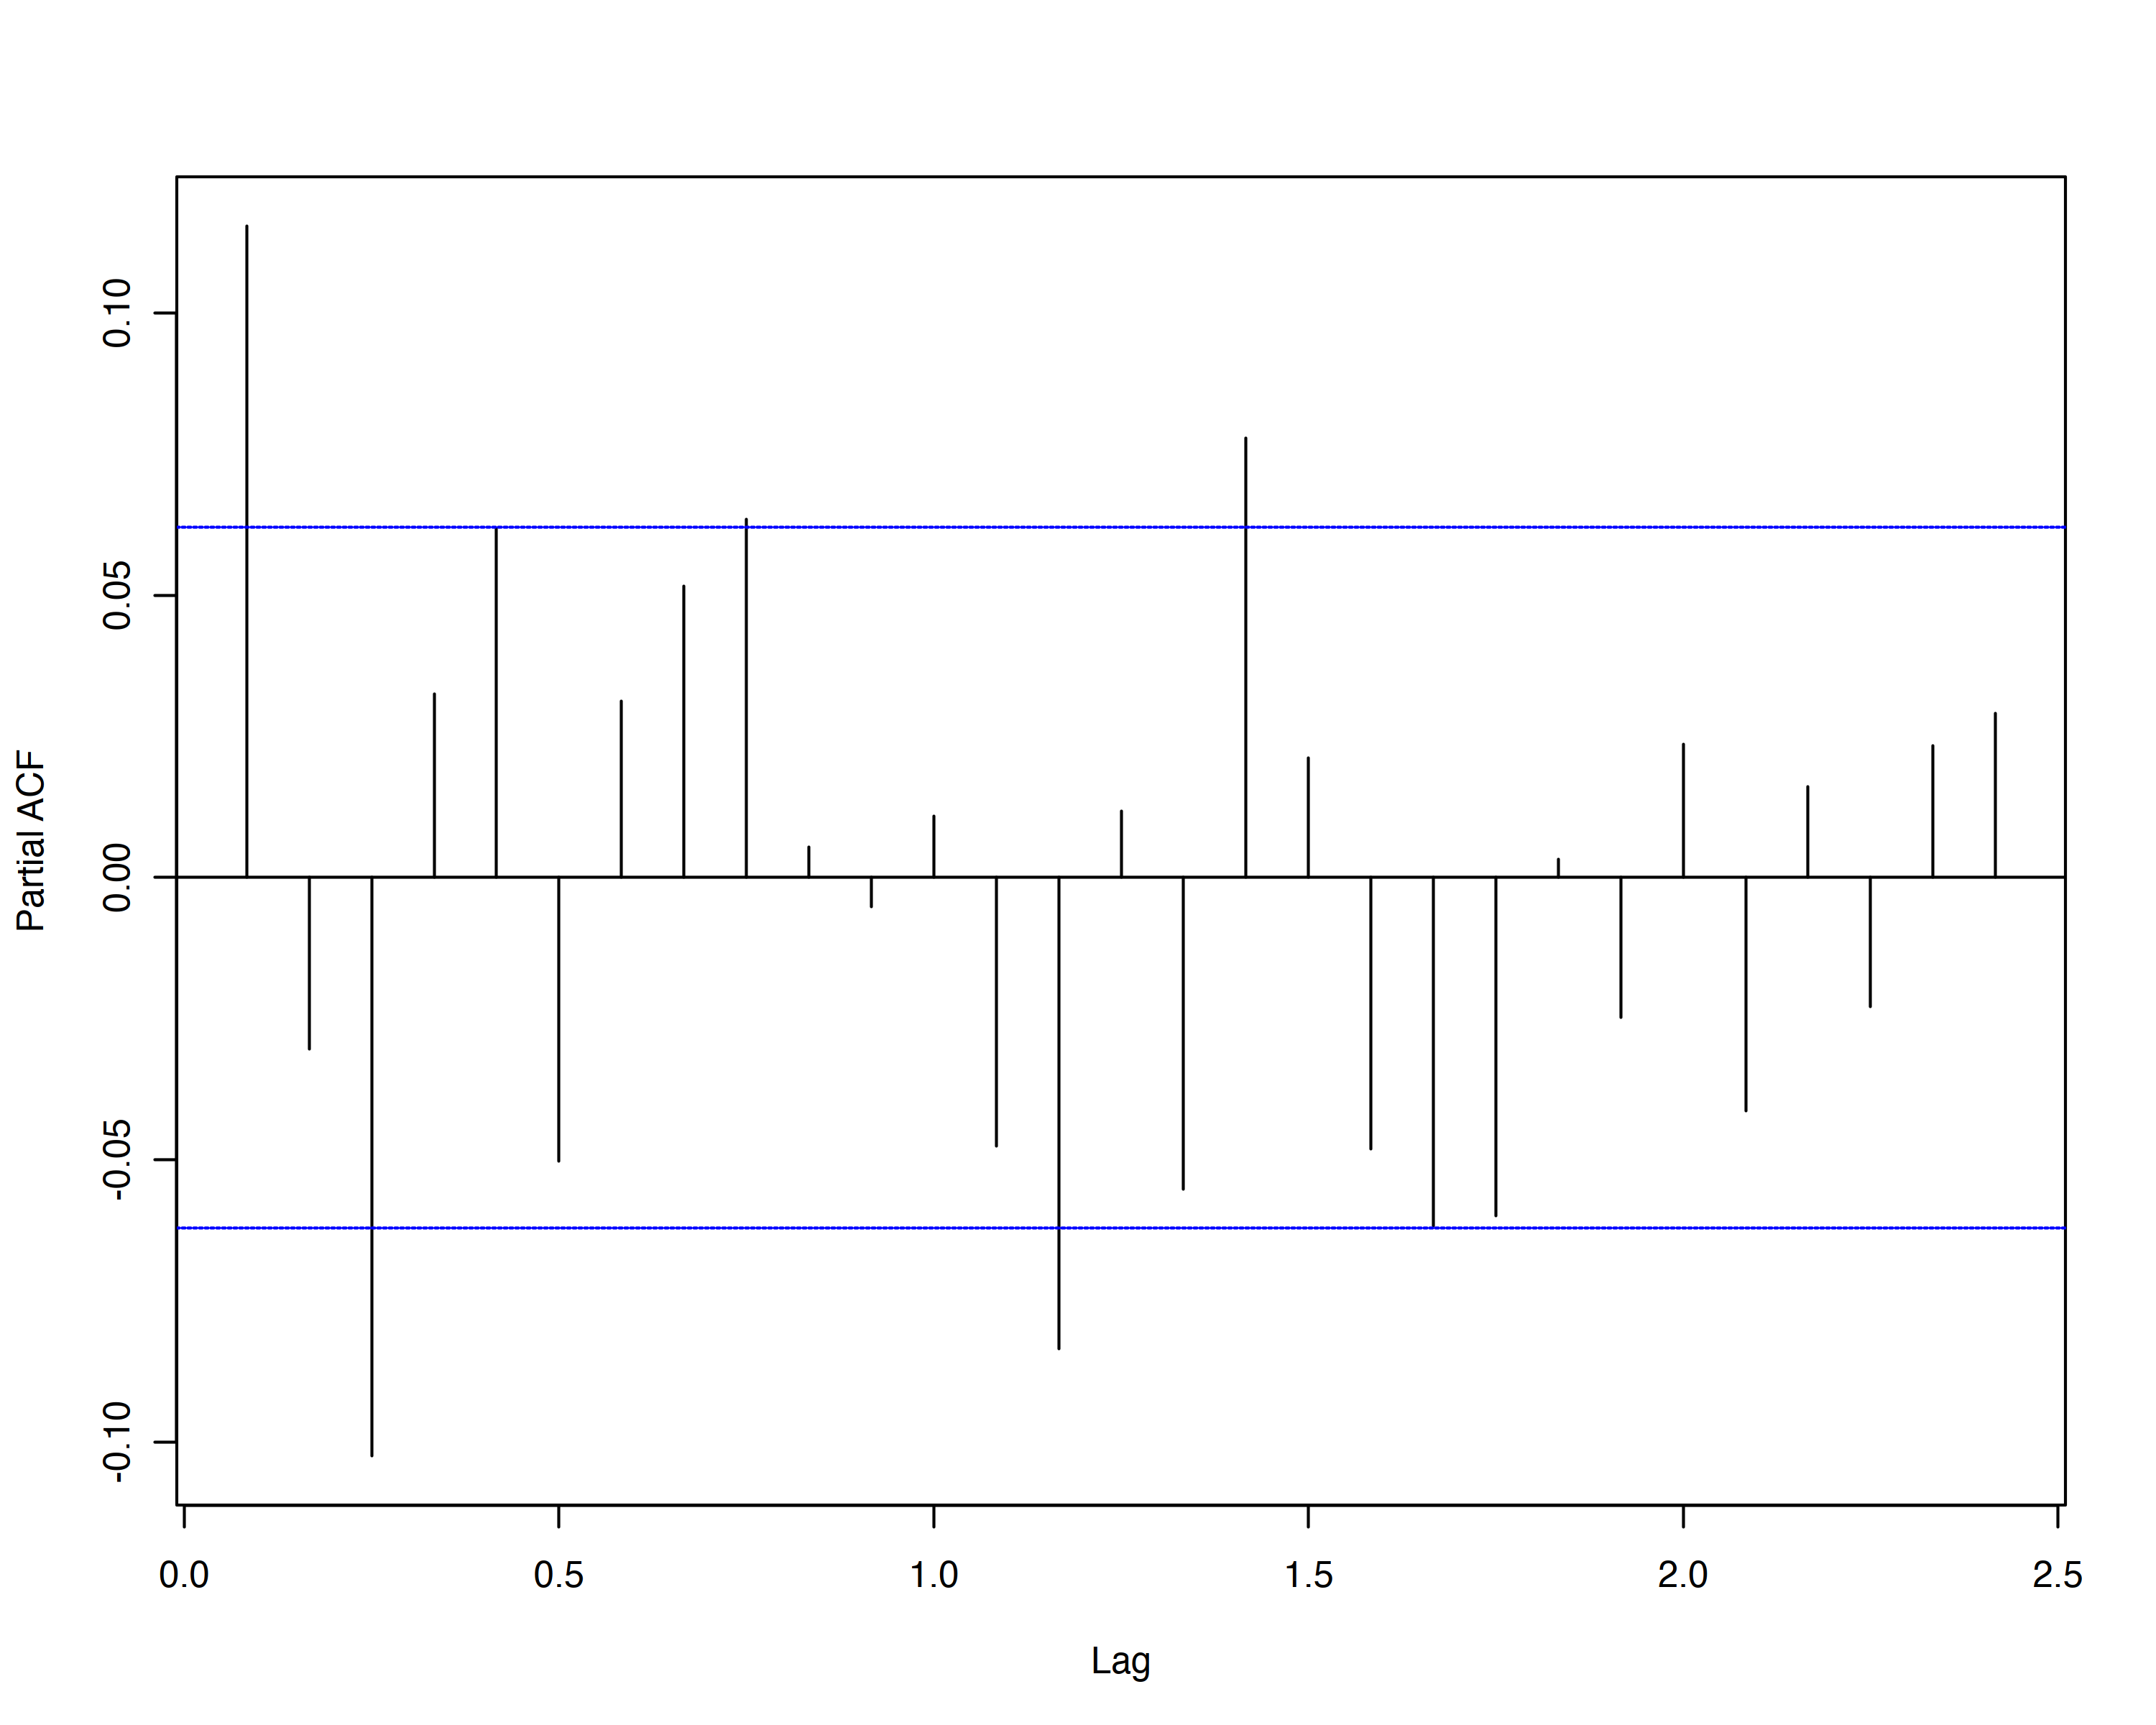

In [107]:
pacf(vw, main = "")

In [108]:
2 / sqrt(length(vw))

# 0.0633724250524478

[1] 0.06337243

In [109]:
# 计算并格式化偏自相关系数（PACF）
tmp <- pacf(vw, plot = FALSE, lag.max = 12)
result <- cbind(
  k = round(tmp$lag * 12),
  pacf = round(tmp$acf, 4)
)
result

k,pacf
1,0.1154
2,-0.0304
3,-0.1025
4,0.0326
5,0.0618
6,-0.0502
7,0.0312
8,0.0517
9,0.0635
10,0.0053


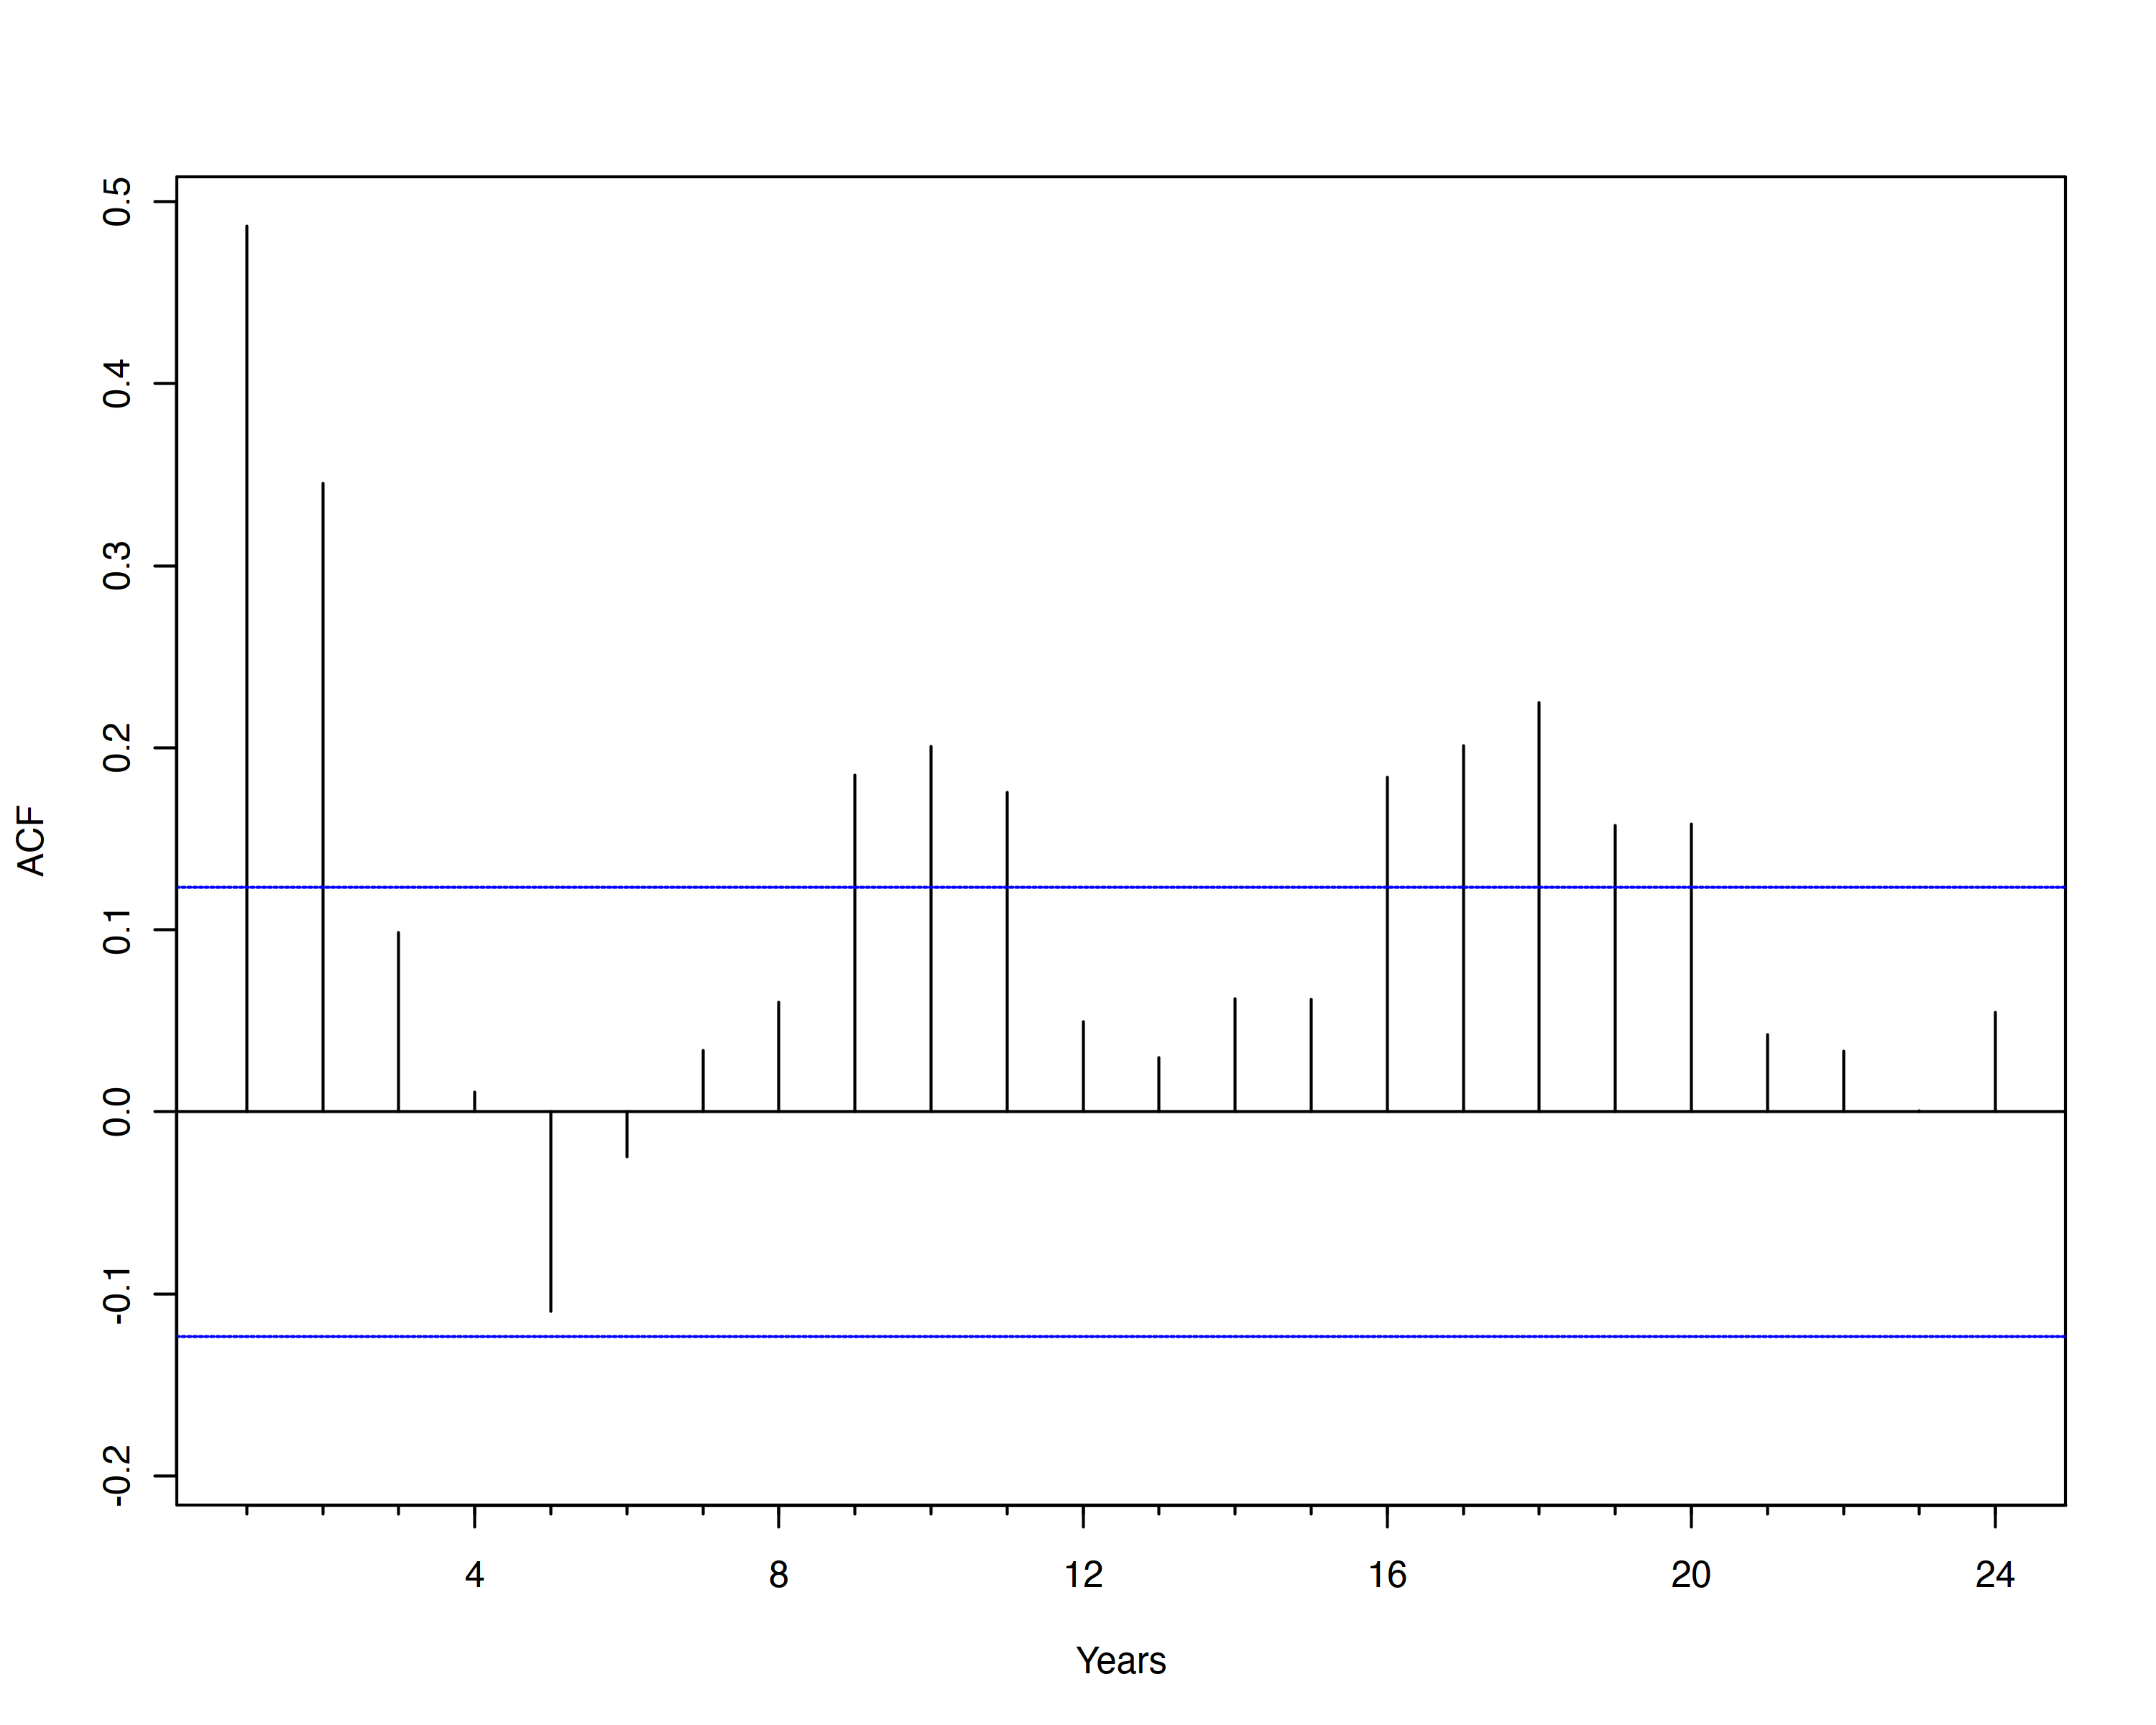

In [110]:
forecast::Acf(rate, xlab = "Years", main = "")

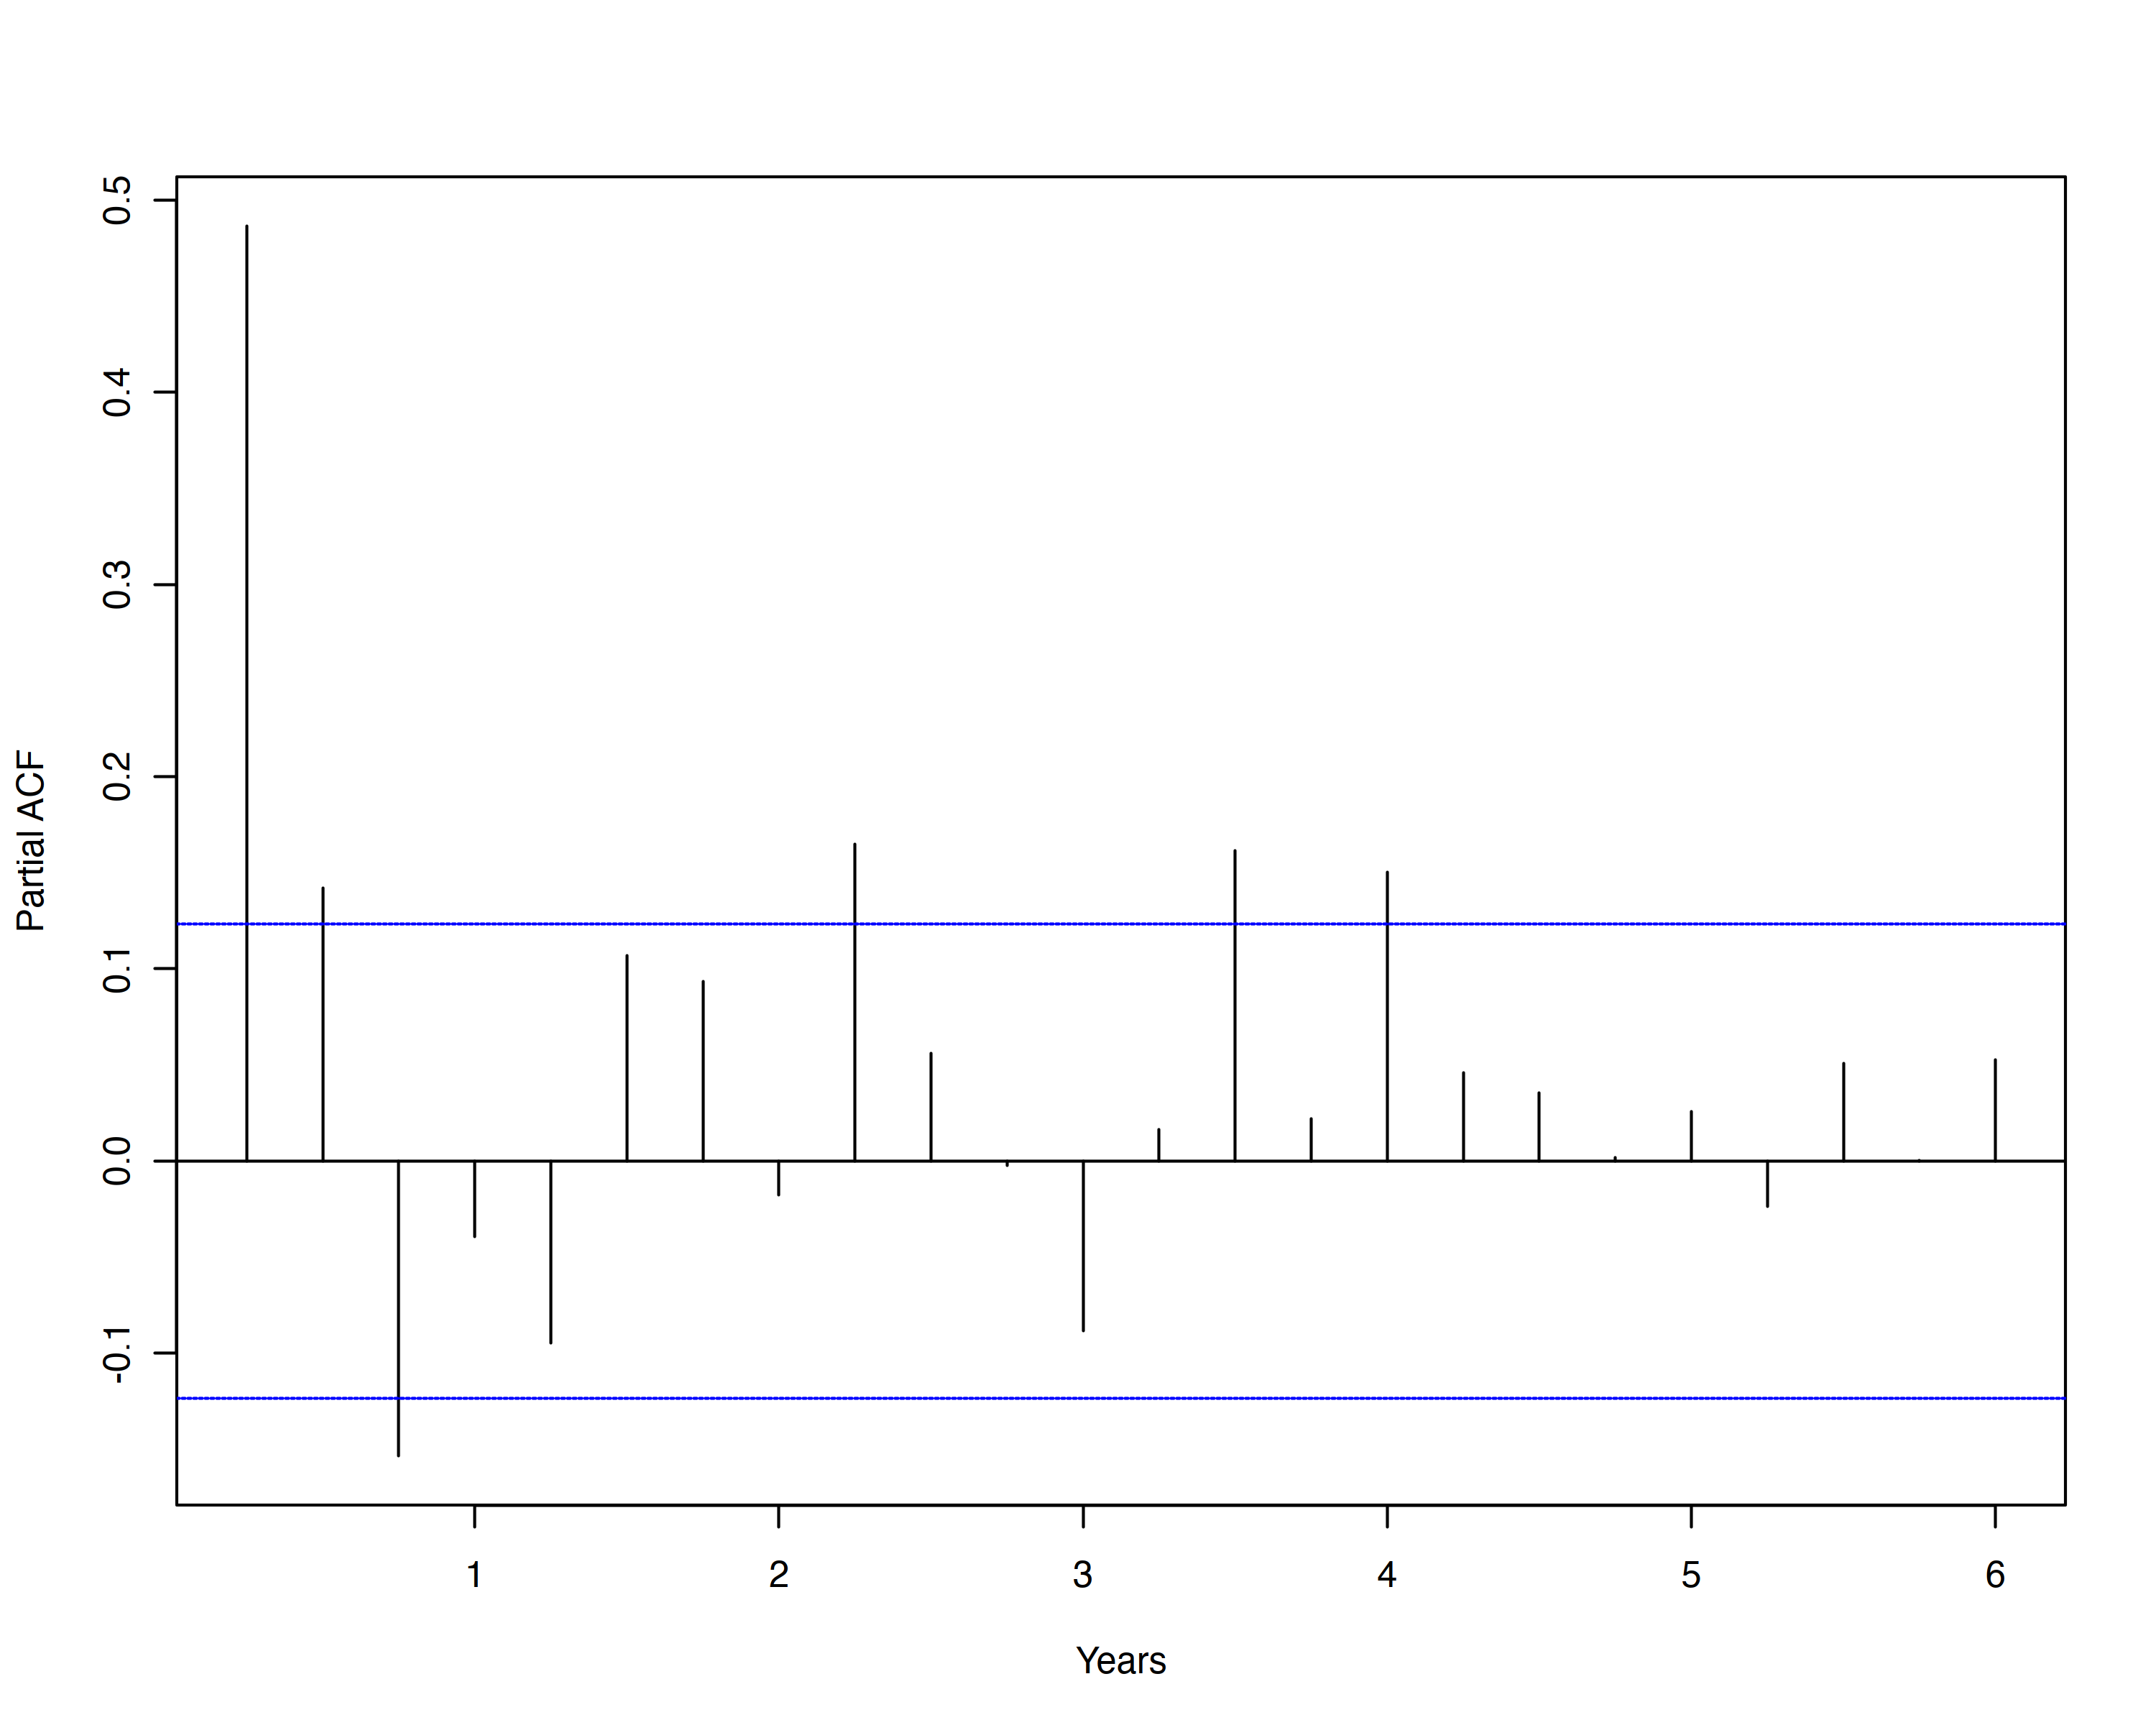

In [111]:
pacf(rate, xlab = "Years", main = "")

In [112]:
# 计算对数增长率并拟合AR模型，优化代码格式
gnprate <- diff(log(gnp))
resm <- ar(gnprate, method = "mle")
resm

# Call:
# ar(x = gnprate, method = "mle")

# Coefficients:
#       1        2        3        4        5        6        7        8  
#  0.4318   0.1985  -0.1180   0.0189  -0.1607   0.0900   0.0615  -0.0814  
#       9  
#  0.1940  

# Order selected 9  sigma^2 estimated as  8.918e-05


Call:
ar(x = gnprate, method = "mle")

Coefficients:
      1        2        3        4        5        6        7        8  
 0.4318   0.1985  -0.1180   0.0189  -0.1607   0.0900   0.0615  -0.0814  
      9  
 0.1940  

Order selected 9  sigma^2 estimated as  8.918e-05

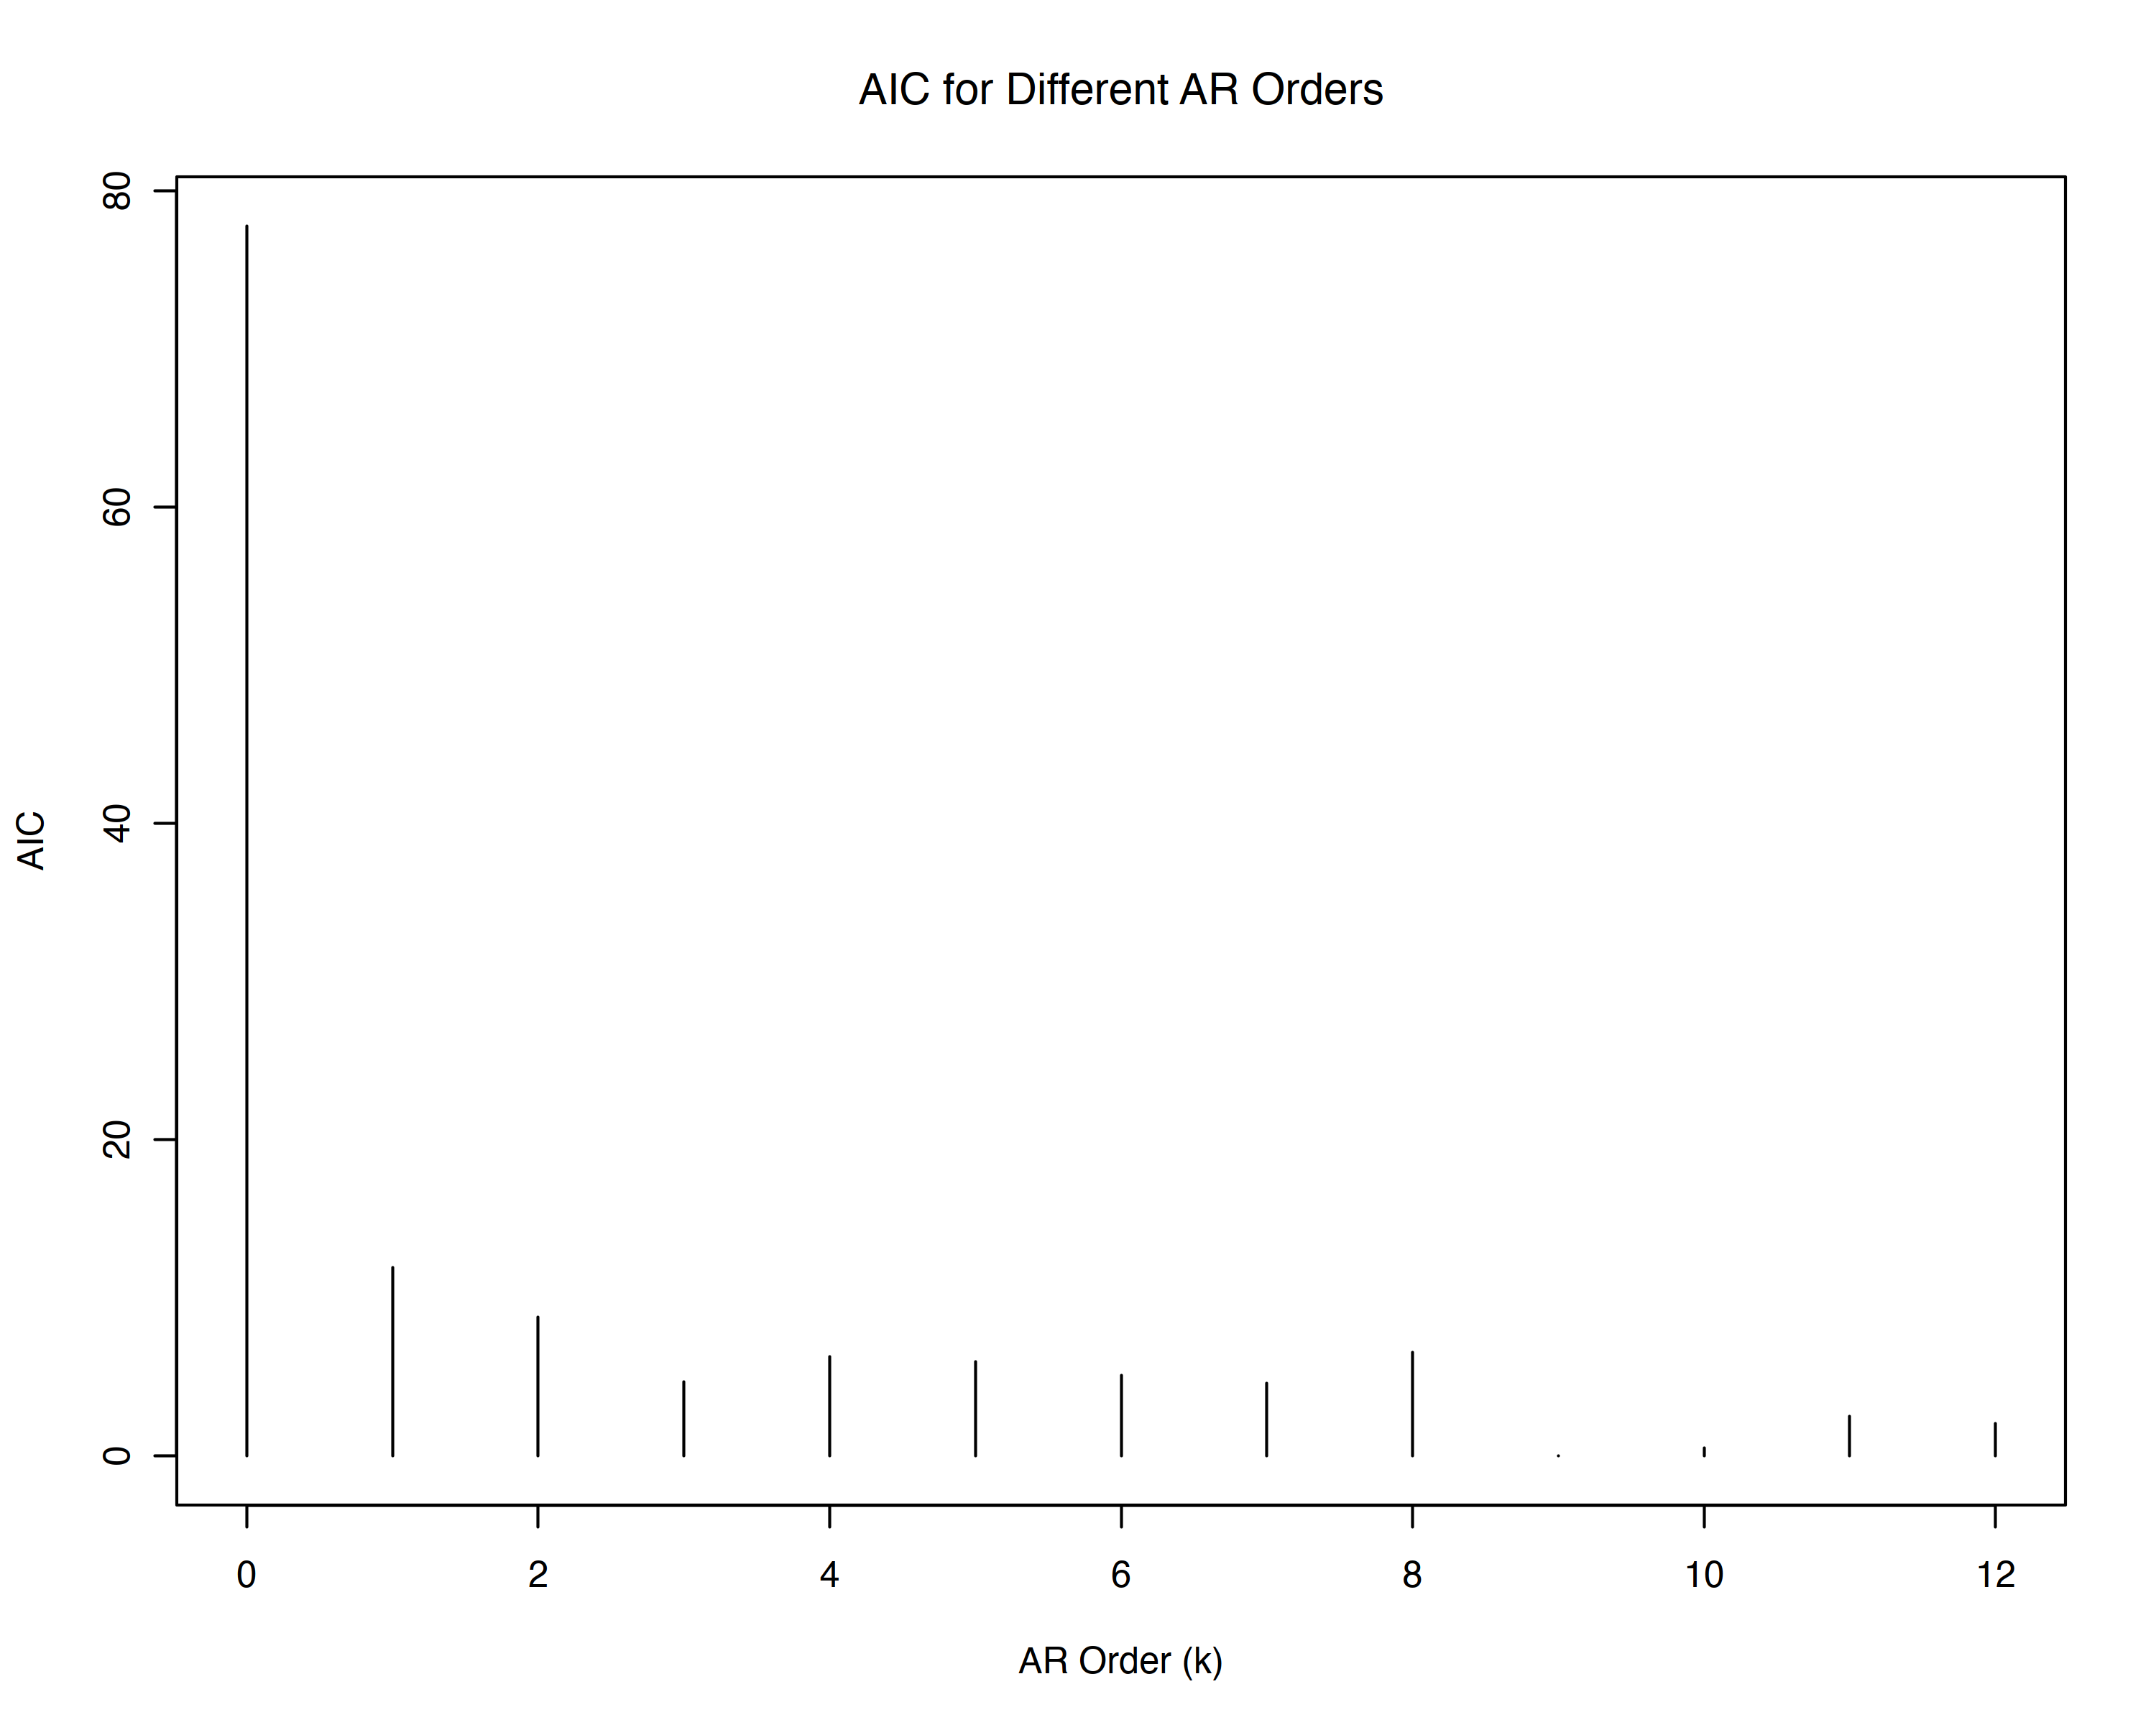

In [113]:
# 优化AIC绘图代码格式
plot(
  as.numeric(names(resm$aic)), resm$aic,
  type = "h",
  xlab = "AR Order (k)",
  ylab = "AIC",
  main = "AIC for Different AR Orders"
)

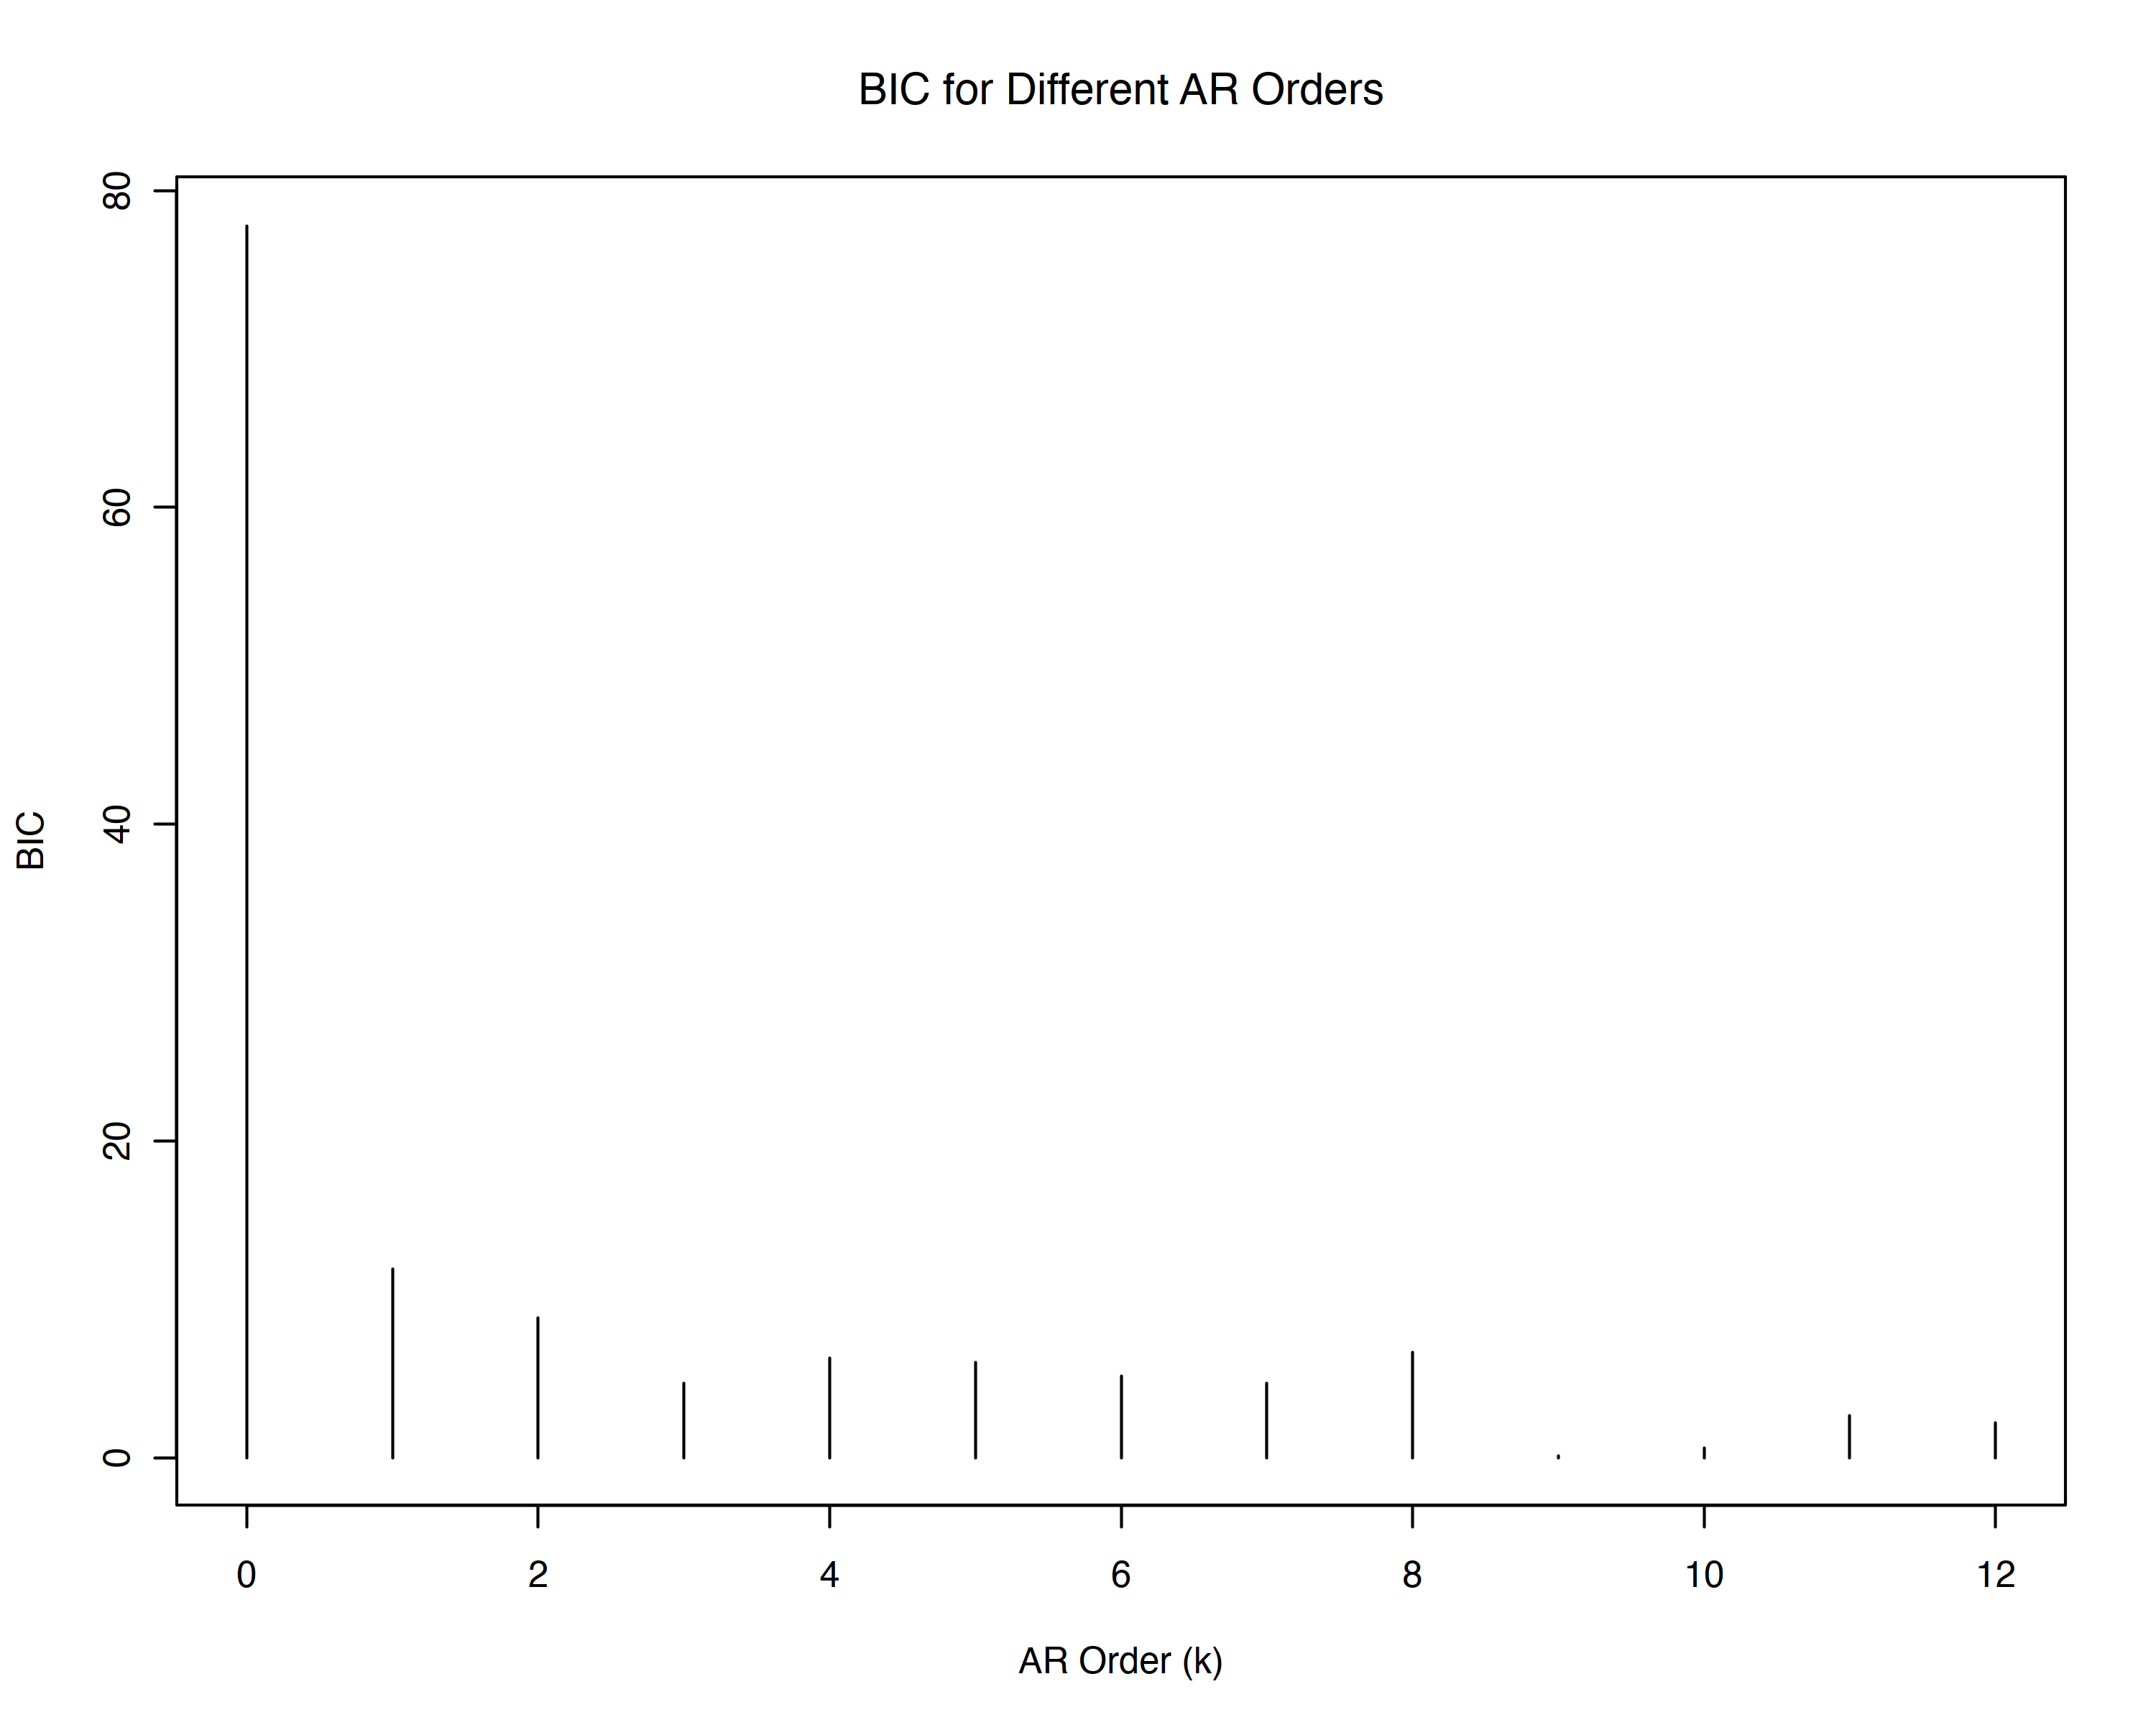

In [114]:
# 计算BIC并绘图，优化代码格式
tmp.T <- length(gnprate)
tmp.bic <- resm$aic + as.numeric(names(resm$aic)) * (log(tmp.T) - 2) / tmp.T

plot(
  as.numeric(names(resm$aic)), tmp.bic,
  type = "h",
  xlab = "AR Order (k)",
  ylab = "BIC",
  main = "BIC for Different AR Orders"
)

In [115]:
# 使用MLE方法拟合AR模型并输出结果，优化代码格式
resm <- ar(vw, method = "mle")
resm

# Call:
# ar(x = vw, method = "mle")

# Coefficients:
#       1        2        3        4        5        6        7        8  
#  0.1167  -0.0112  -0.1126   0.0217   0.0735  -0.0452   0.0254   0.0462  
#       9  
#  0.0660  

# Order selected 9  sigma^2 estimated as  0.002831


Call:
ar(x = vw, method = "mle")

Coefficients:
      1        2        3        4        5        6        7        8  
 0.1167  -0.0112  -0.1126   0.0217   0.0735  -0.0452   0.0254   0.0462  
      9  
 0.0660  

Order selected 9  sigma^2 estimated as  0.002831

In [116]:
round(resm$aic, 2)

0     1     2     3     4     5     6     7     8     9    10    11    12 
22.33 10.99 12.07  3.35  4.37  2.46  1.96  3.04  2.24  0.00  1.97  3.94  5.81

In [117]:
# 计算并输出vw的均值，优化代码格式
mean_vw <- mean(vw)
mean_vw

[1] 0.00890439

In [118]:
resm2 <- arima(vw, order = c(3, 0, 0))
resm2

# Call:
# arima(x = vw, order = c(3, 0, 0))

# Coefficients:
#          ar1      ar2      ar3  intercept
#       0.1158  -0.0187  -0.1042     0.0089
# s.e.  0.0315   0.0317   0.0317     0.0017

# sigma^2 estimated as 0.002875:  log likelihood = 1500.86,  aic = -2991.73


Call:
arima(x = vw, order = c(3, 0, 0))

Coefficients:
         ar1      ar2      ar3  intercept
      0.1158  -0.0187  -0.1042     0.0089
s.e.  0.0315   0.0317   0.0317     0.0017

sigma^2 estimated as 0.002875:  log likelihood = 1500.86,  aic = -2991.73

In [119]:
(1 + mean_vw)^12 - 1

# 0.112244172268276

[1] 0.1122442

In [120]:
((1 + mean_vw)^12)^83 - 1

# 6832.00168577829

[1] 6832.002

In [121]:
prod(1 + vw) - 1

# 1591.95348104506

[1] 1591.953

In [122]:
prod(1 + vw)^(1 / 83) - 1

# 0.0929008410097438

[1] 0.09290084

In [123]:
length(vw)

[1] 996

In [124]:
log(length(vw))

[1] 6.903747

In [125]:
# 拟合AR(3)模型并进行Ljung-Box检验，优化代码格式
resm2 <- arima(vw, order = c(3, 0, 0))
Box.test(
  resm2$residuals,
  lag = 12,
  type = "Ljung",
  fitdf = 3
)

# Box-Ljung test

# data:  resm2$residuals
# X-squared = 16.352, df = 9, p-value = 0.05988


	Box-Ljung test

data:  resm2$residuals
X-squared = 16.352, df = 9, p-value = 0.05988


In [126]:
# 拟合AR(3)模型，固定ar2为0，优化代码格式
resm3 <- arima(
  vw,
  order = c(3, 0, 0),
  fixed = c(NA, 0, NA, NA)
)
resm3

# Call:
# arima(x = vw, order = c(3, 0, 0), fixed = c(NA, 0, NA, NA))

# Coefficients:
#          ar1  ar2      ar3  intercept
#       0.1136    0  -0.1063     0.0089
# s.e.  0.0313    0   0.0315     0.0017

# sigma^2 estimated as 0.002876:  log likelihood = 1500.69,  aic = -2993.38

Warning message in arima(vw, order = c(3, 0, 0), fixed = c(NA, 0, NA, NA)):
"some AR parameters were fixed: setting transform.pars = FALSE"



Call:
arima(x = vw, order = c(3, 0, 0), fixed = c(NA, 0, NA, NA))

Coefficients:
         ar1  ar2      ar3  intercept
      0.1136    0  -0.1063     0.0089
s.e.  0.0313    0   0.0315     0.0017

sigma^2 estimated as 0.002876:  log likelihood = 1500.69,  aic = -2993.38

In [127]:
abs(polyroot(c(1, -coef(resm3)[1:3])))

[1] 2.031585 2.279433 2.031585

In [128]:
# 优化Ljung-Box检验代码格式
Box.test(
  resm3$residuals,
  lag = 12,
  type = "Ljung",
  fitdf = 2
)

# Box-Ljung test

# data:  resm3$residuals
# X-squared = 16.828, df = 10, p-value = 0.07827


	Box-Ljung test

data:  resm3$residuals
X-squared = 16.828, df = 10, p-value = 0.07827



	Ljung-Box test

data:  Residuals from ARIMA(3,0,0) with non-zero mean
Q* = 16.828, df = 9, p-value = 0.05148

Model df: 3.   Total lags used: 12



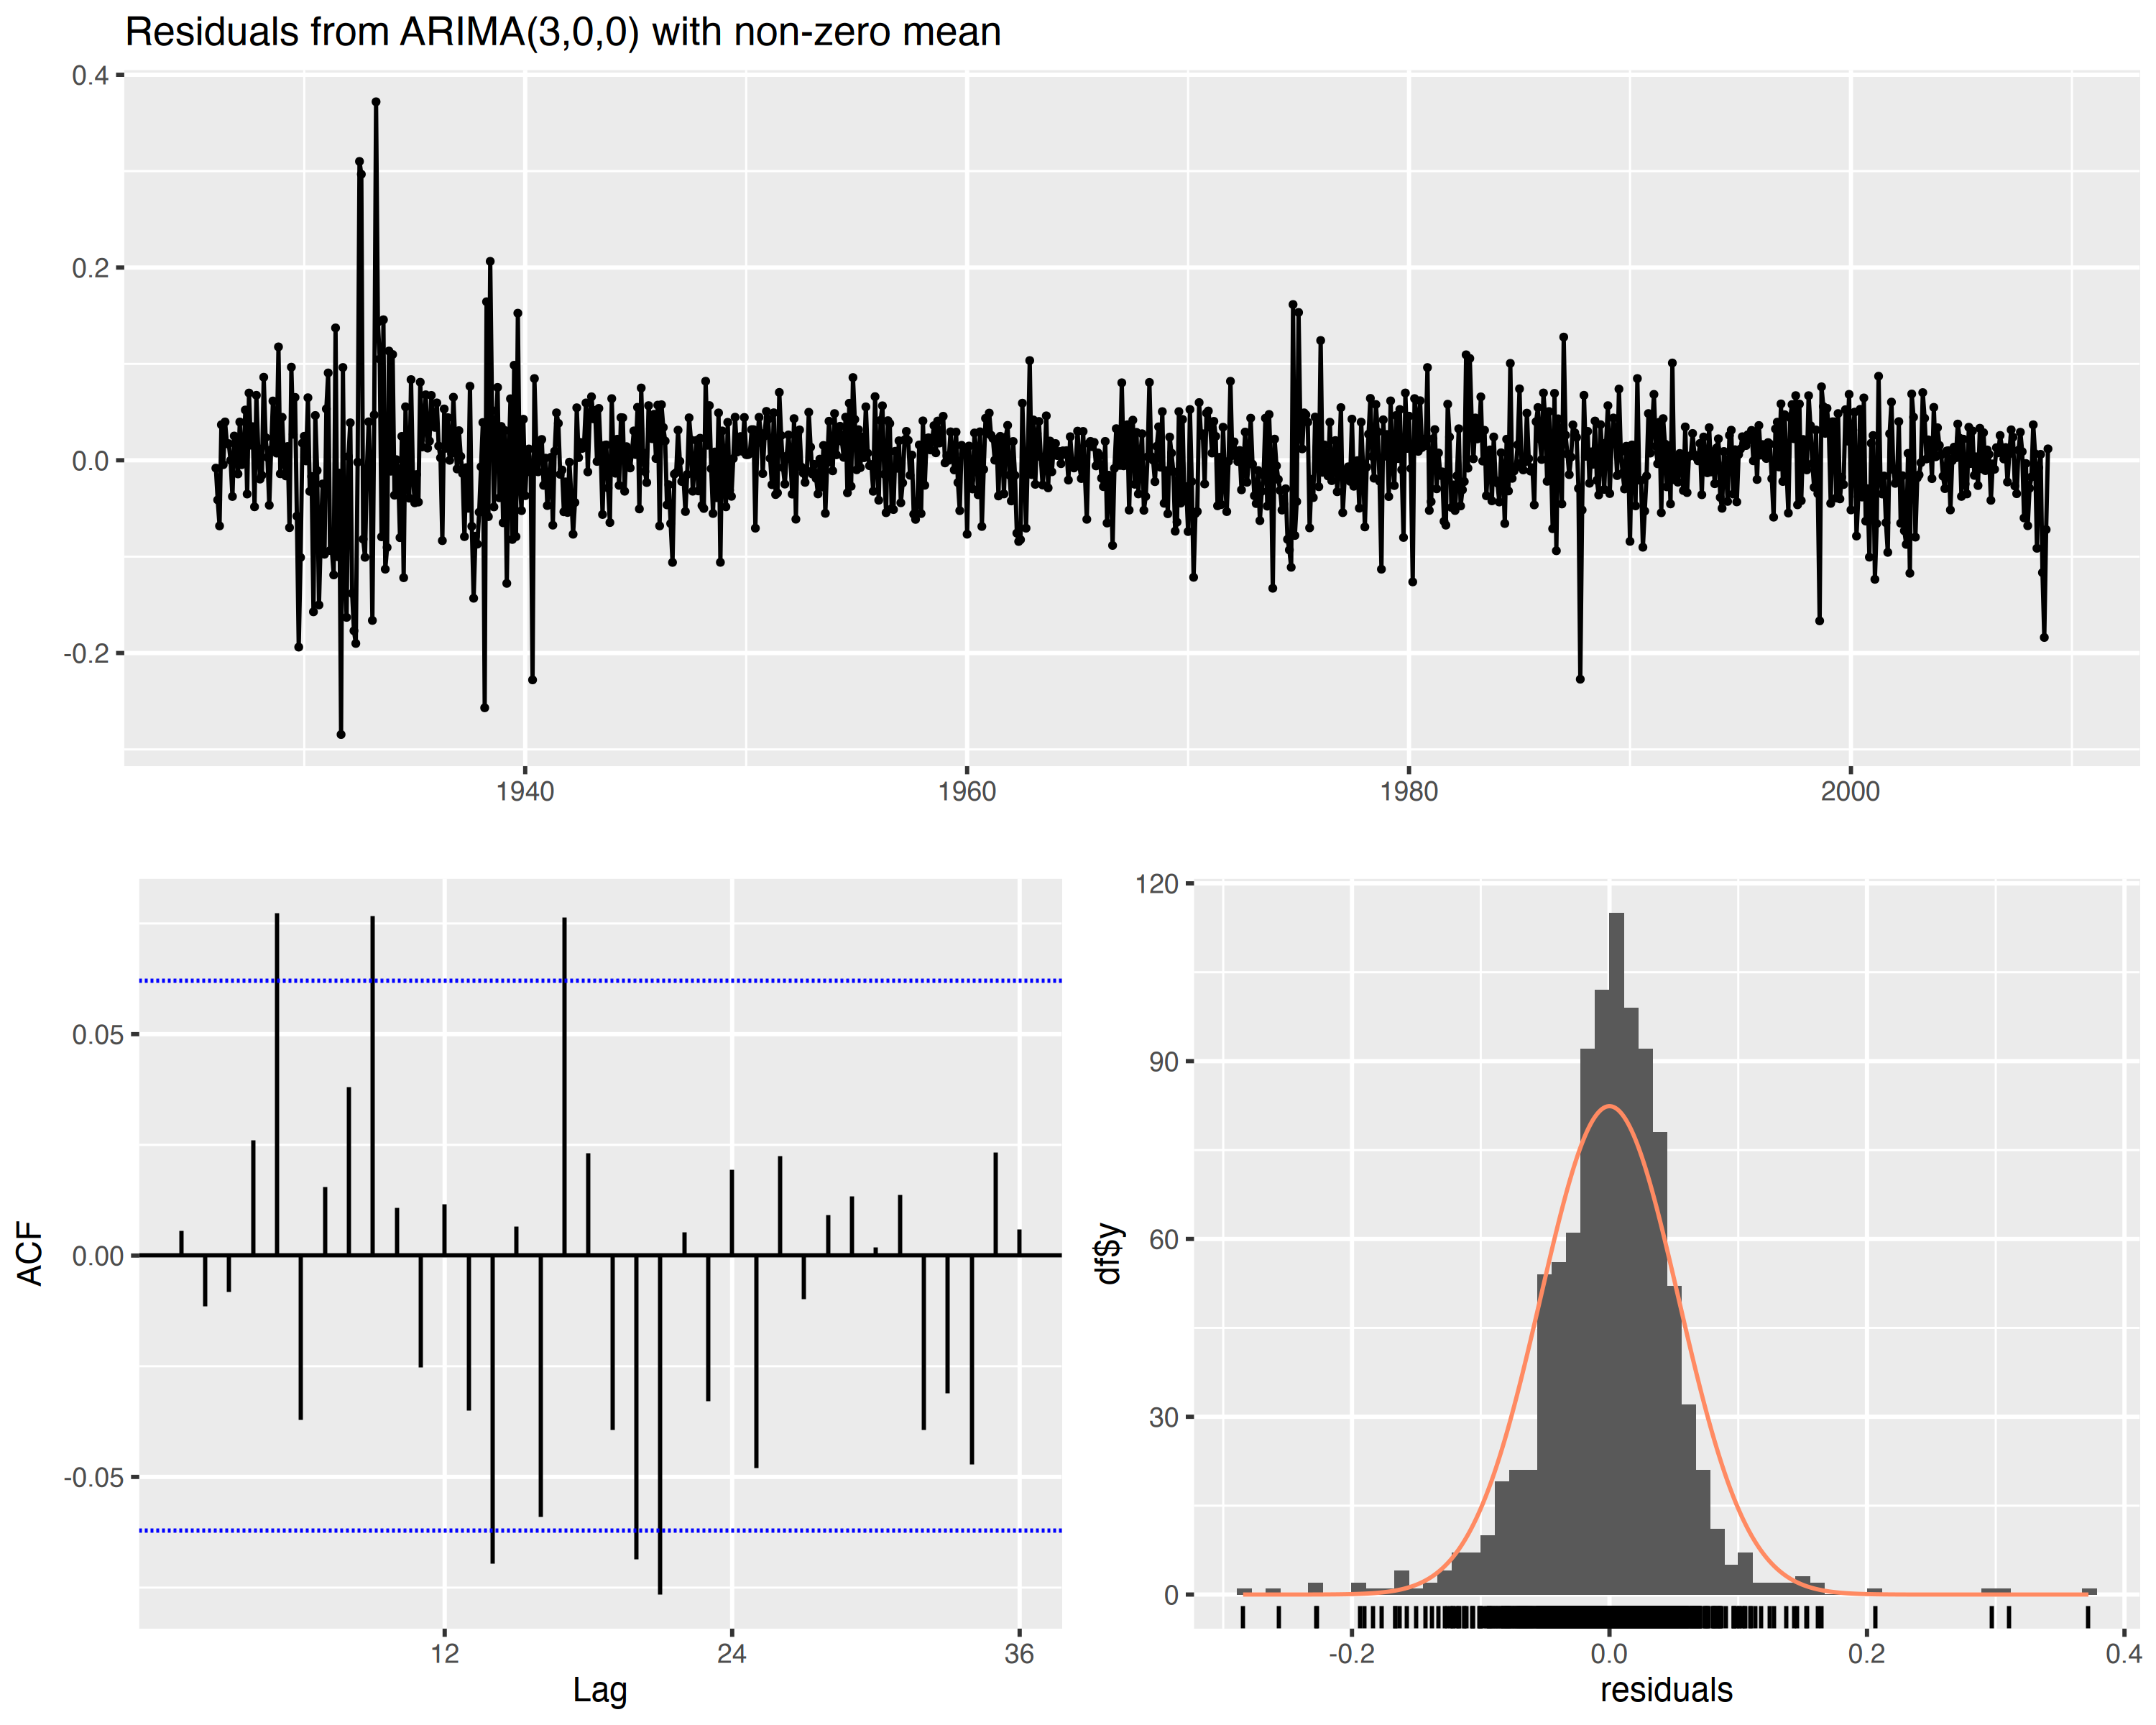

In [129]:
forecast::checkresiduals(resm3, lag = 12, df = 10)

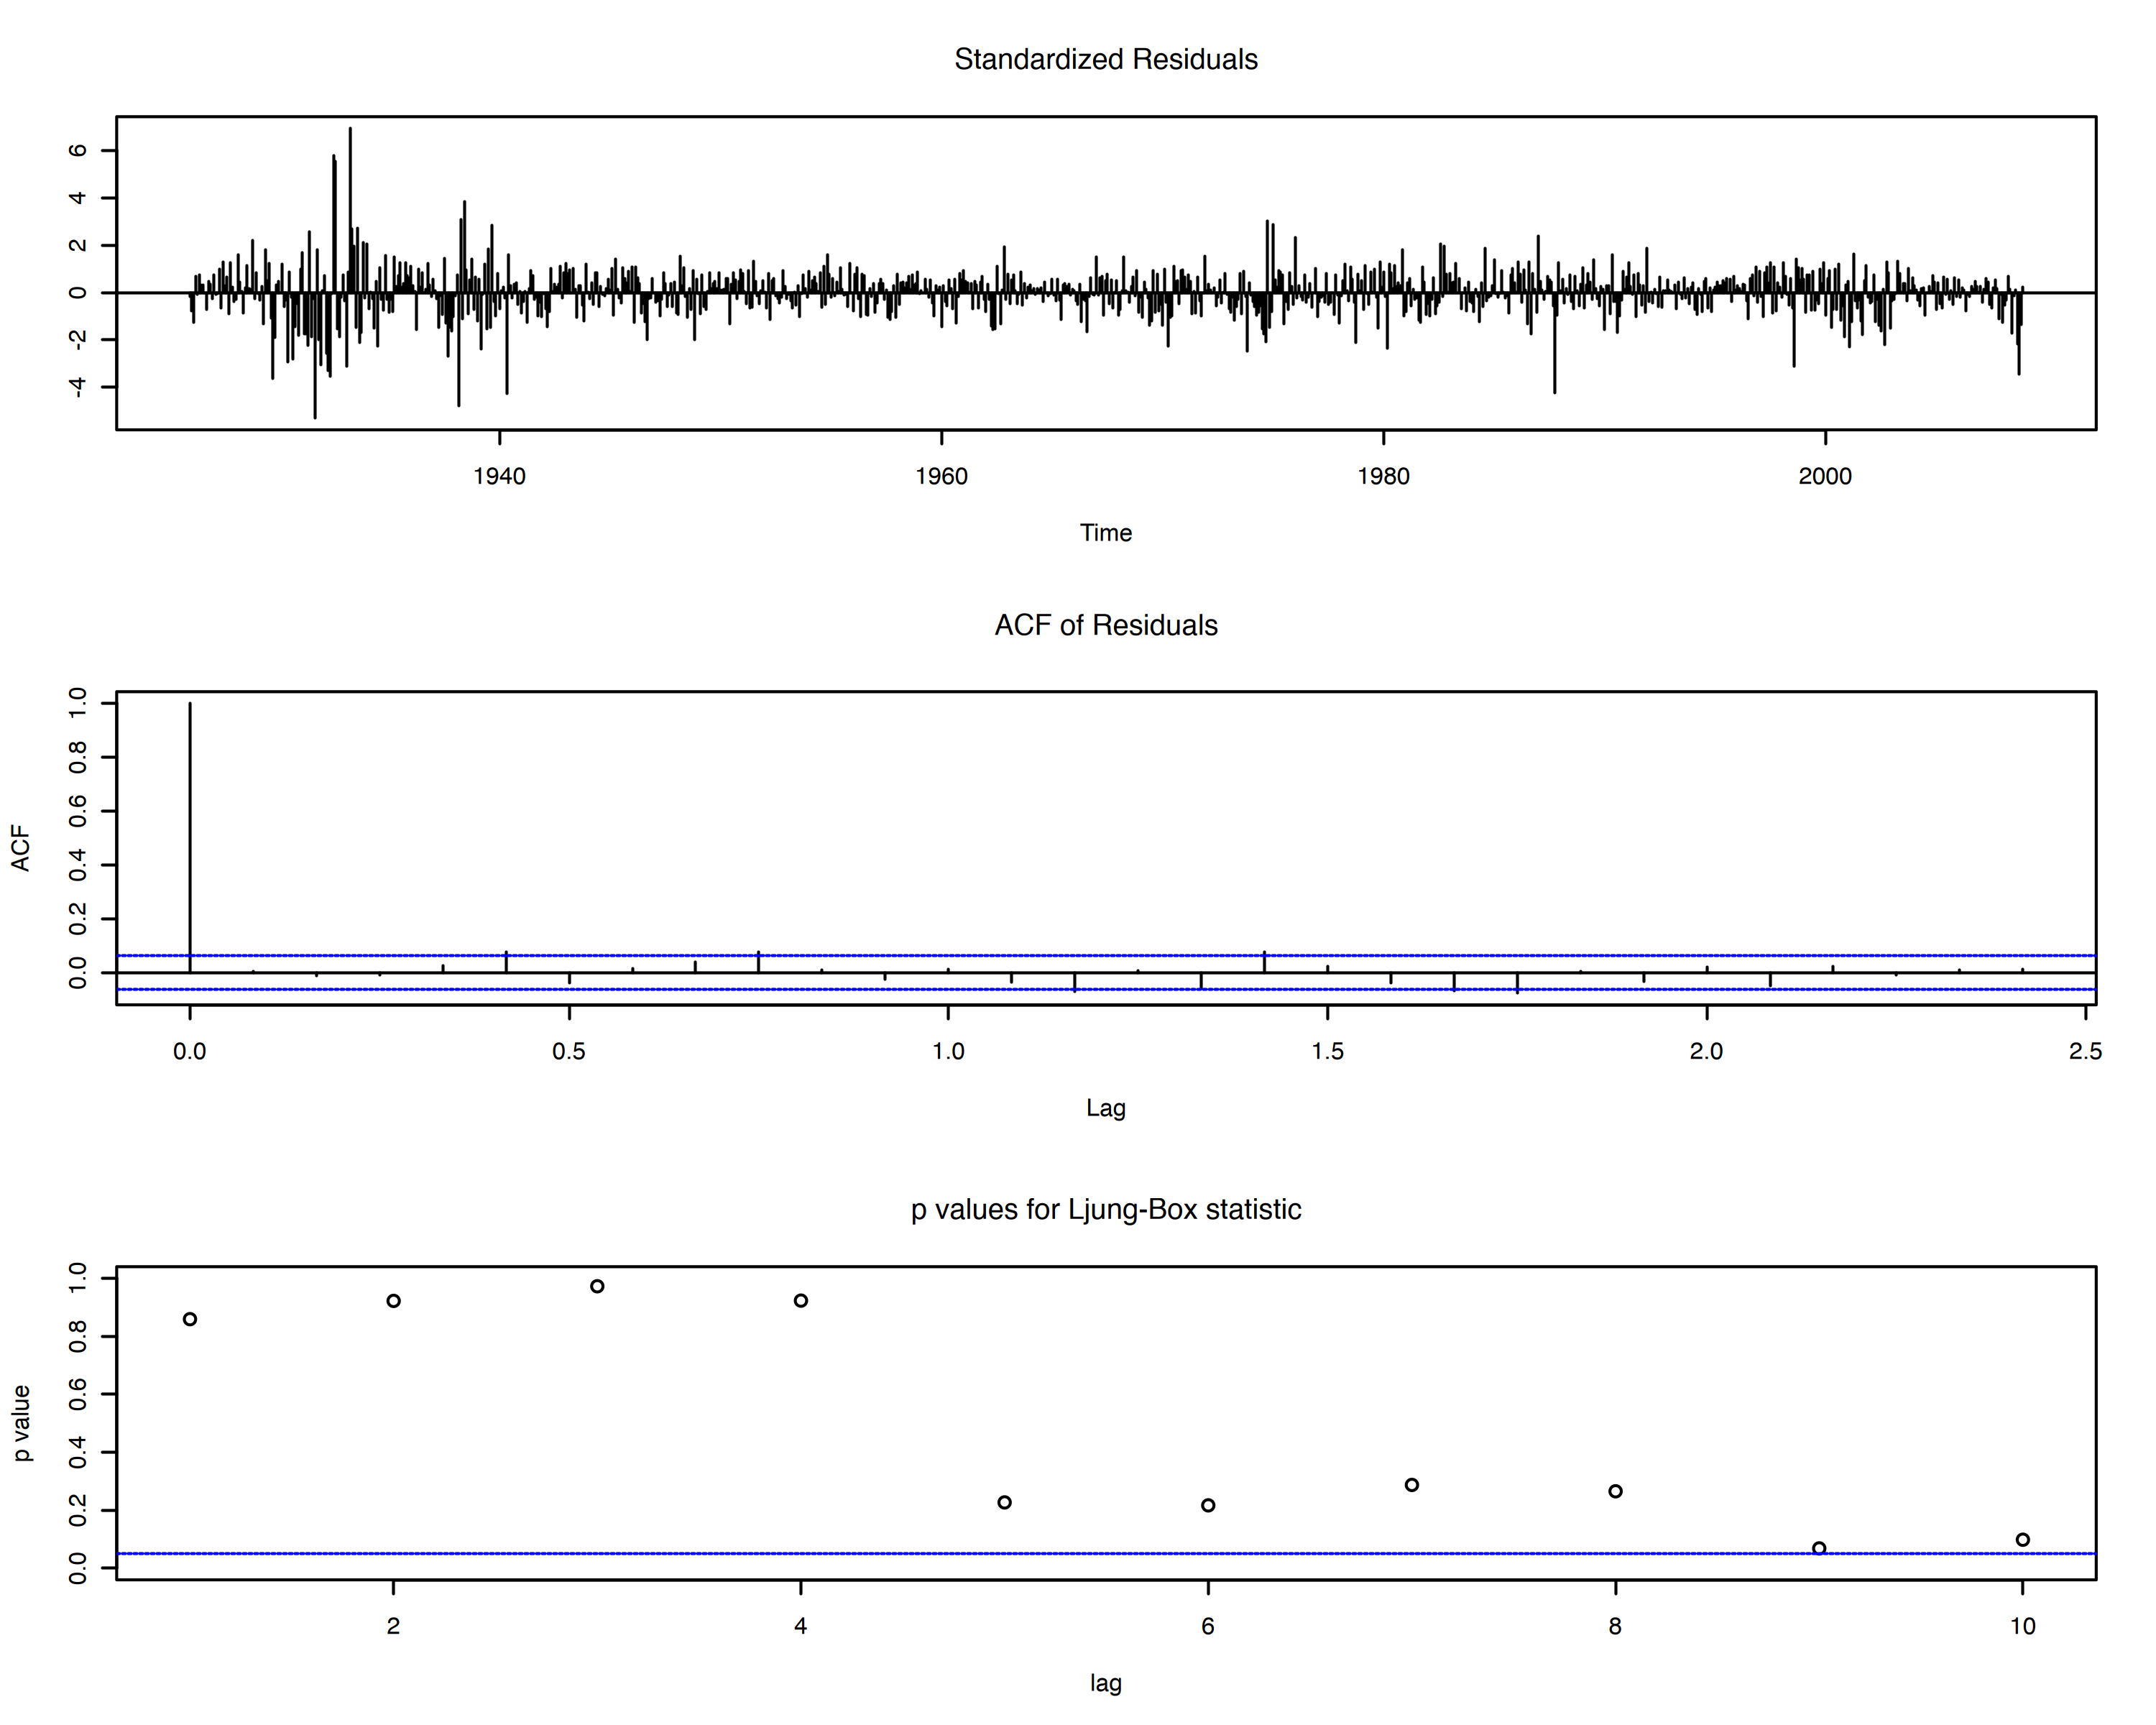

In [130]:
tsdiag(resm3)

In [131]:
# 拟合AR(3)模型并进行12步预测，优化代码格式
resm4 <- arima(vw[1:984], order = c(3, 0, 0))
pred4 <- predict(resm4, n.ahead = 12, se.fit = TRUE)
result_pred <- cbind(
  Observed = round(vw[985:996], 4),
  Predict = round(pred4$pred, 4),
  SE = round(pred4$se, 3)
)
result_pred

,Observed,Predict,SE
985,-0.0623,0.0075,0.053
986,-0.0220,0.0160,0.054
987,-0.0105,0.0117,0.054
988,0.0511,0.0098,0.054
989,0.0238,0.0088,0.054
990,-0.0786,0.0092,0.054
991,-0.0132,0.0094,0.054
992,0.0110,0.0096,0.054
993,-0.0981,0.0095,0.054
994,-0.1847,0.0095,0.054


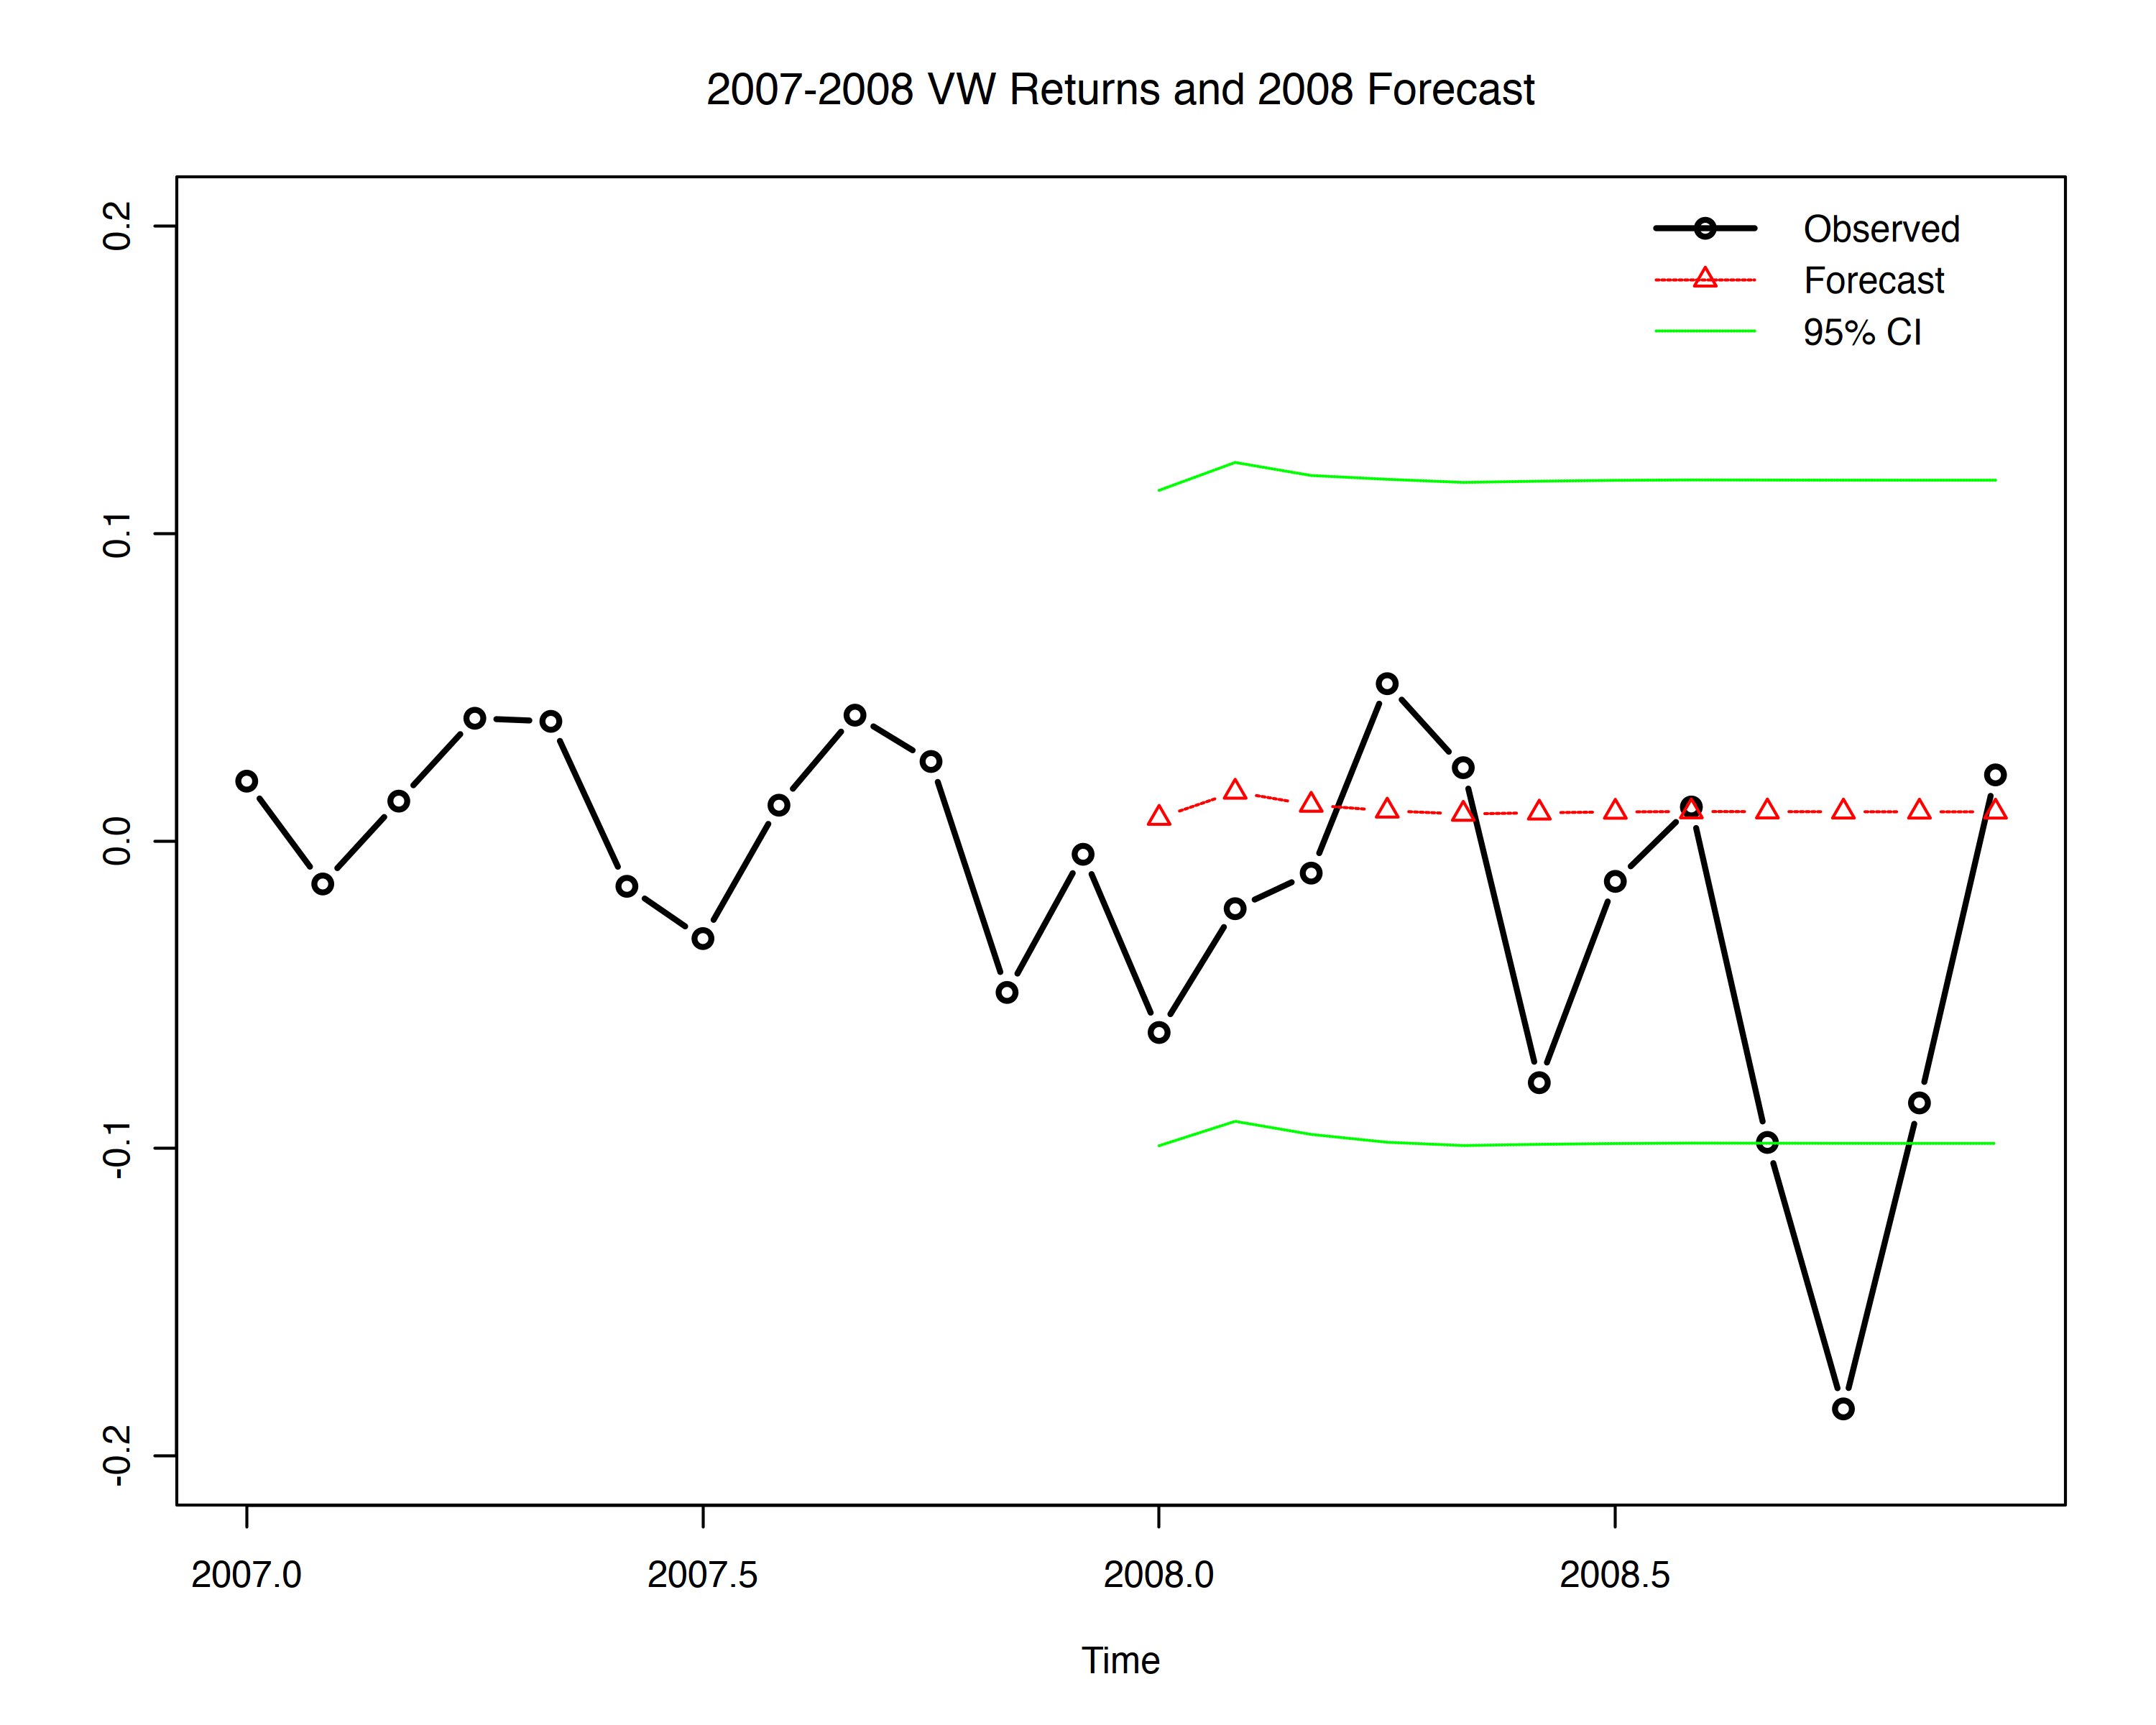

In [132]:
# 优化绘图代码格式，添加图例
plot(
  window(vw, start = c(2007, 1), end = c(2008, 12)),
  ylab = "",
  type = "b",
  ylim = c(-0.2, 0.2),
  lwd = 2,
  main = "2007-2008 VW Returns and 2008 Forecast"
)
lines(
  ts(pred4$pred, start = c(2008, 1), frequency = 12),
  col = "red",
  lwd = 1,
  lty = 2,
  type = "b",
  pch = 2
)
lines(
  ts(pred4$pred - 2 * pred4$se, start = c(2008, 1), frequency = 12),
  col = "green",
  lwd = 1,
  lty = 3
)
lines(
  ts(pred4$pred + 2 * pred4$se, start = c(2008, 1), frequency = 12),
  col = "green",
  lwd = 1,
  lty = 3
)
legend(
  "topright",
  legend = c("Observed", "Forecast", "95% CI"),
  col = c("black", "red", "green"),
  lty = c(1, 2, 3),
  lwd = c(2, 1, 1),
  pch = c(1, 2, NA),
  bty = "n"
)

In [133]:
fc <- forecast::forecast(resm4, h = 12)
fc

# Point Forecast       Lo 80      Hi 80       Lo 95     Hi 95
# 985    0.007455686 -0.06083694 0.07574831 -0.09698887 0.1119002
# 986    0.015952488 -0.05270459 0.08460957 -0.08904946 0.1209544
# 987    0.011701663 -0.05695841 0.08036174 -0.09330486 0.1167082
# 988    0.009806653 -0.05927763 0.07889093 -0.09584863 0.1154619
# 989    0.008770886 -0.06033071 0.07787249 -0.09691089 0.1144527
# 990    0.009164644 -0.05993698 0.07826627 -0.09651718 0.1148465
# 991    0.009432520 -0.05967458 0.07853962 -0.09625768 0.1151227
# 992    0.009565095 -0.05954249 0.07867268 -0.09612583 0.1152560
# 993    0.009530555 -0.05957703 0.07863814 -0.09616037 0.1152215
# 994    0.009495151 -0.05961250 0.07860281 -0.09619589 0.1151862
# 995    0.009477748 -0.05962992 0.07858541 -0.09621331 0.1151688
# 996    0.009480420 -0.05962725 0.07858808 -0.09621063 0.1151715

    Point Forecast       Lo 80      Hi 80       Lo 95     Hi 95
985    0.007455686 -0.06083694 0.07574831 -0.09698887 0.1119002
986    0.015952488 -0.05270459 0.08460957 -0.08904946 0.1209544
987    0.011701663 -0.05695841 0.08036174 -0.09330486 0.1167082
988    0.009806653 -0.05927763 0.07889093 -0.09584863 0.1154619
989    0.008770886 -0.06033071 0.07787249 -0.09691089 0.1144527
990    0.009164644 -0.05993698 0.07826627 -0.09651718 0.1148465
991    0.009432520 -0.05967458 0.07853962 -0.09625768 0.1151227
992    0.009565095 -0.05954249 0.07867268 -0.09612583 0.1152560
993    0.009530555 -0.05957703 0.07863814 -0.09616037 0.1152215
994    0.009495151 -0.05961250 0.07860281 -0.09619589 0.1151862
995    0.009477748 -0.05962992 0.07858541 -0.09621331 0.1151688
996    0.009480420 -0.05962725 0.07858808 -0.09621063 0.1151715

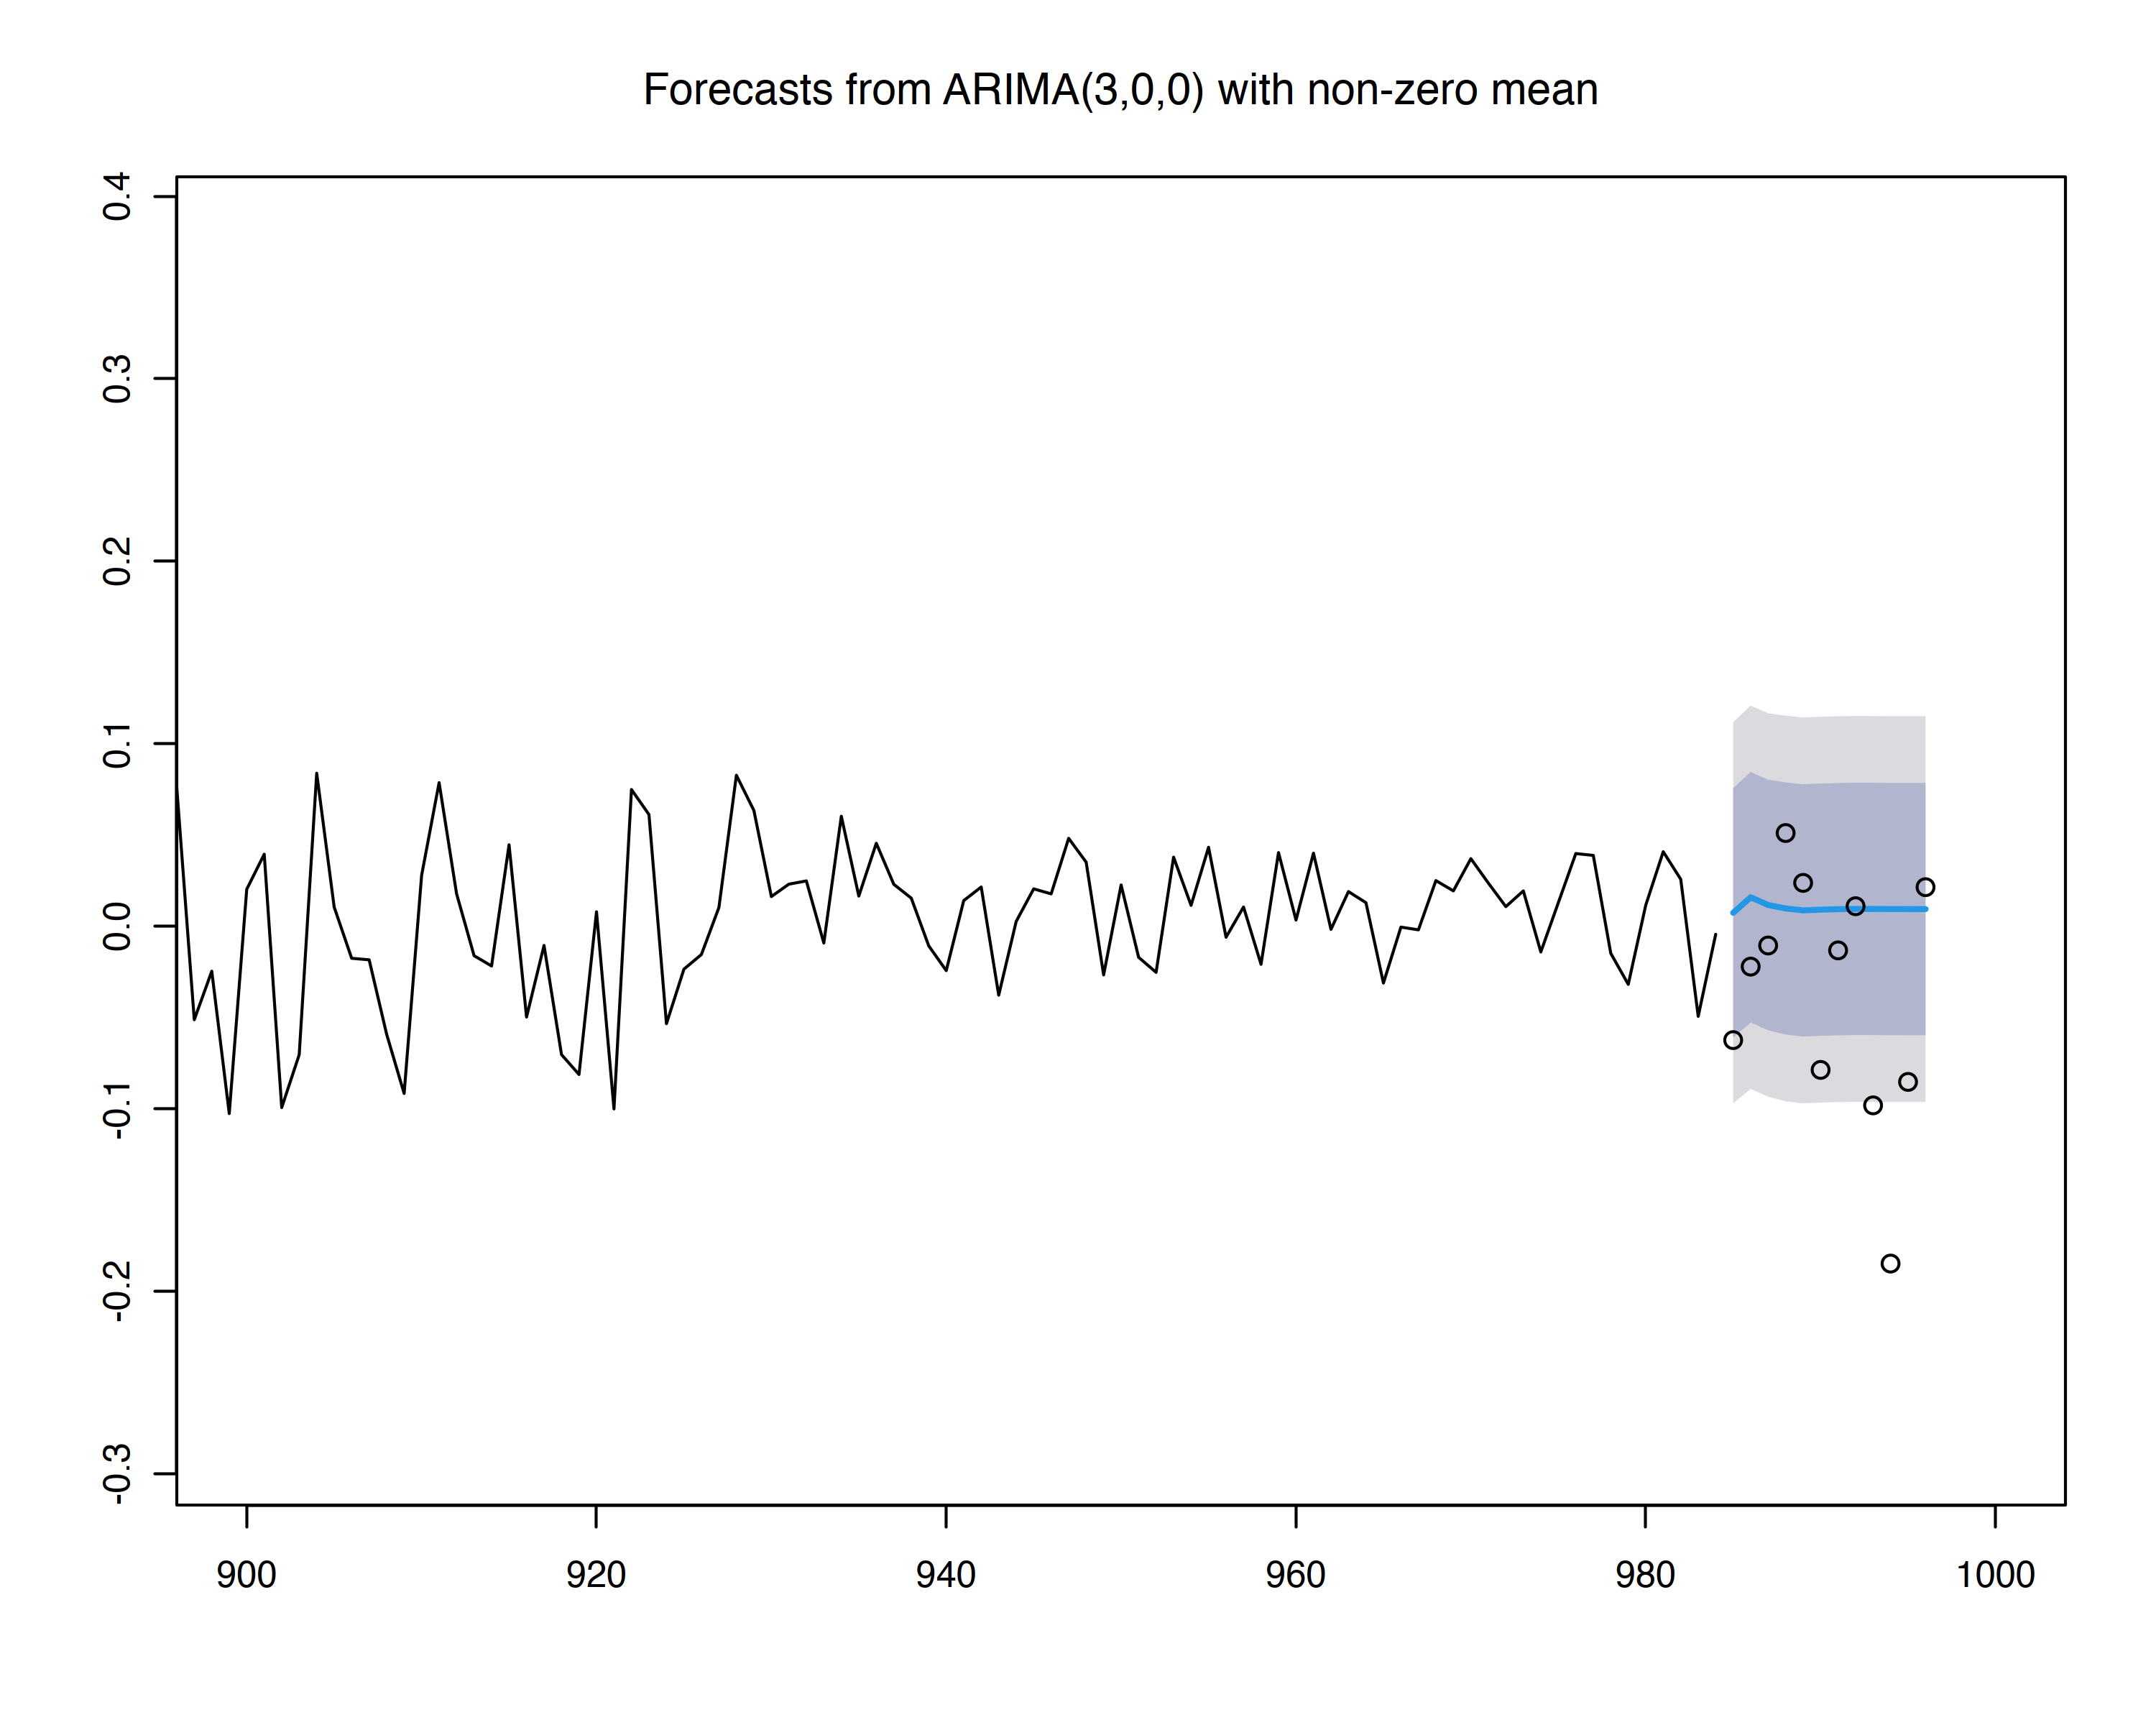

In [134]:
plot(fc, xlim = c(900, 1000))
points(985:996, vw[985:996])

In [135]:
# 拟合AR(3)模型并进行12步预测，优化代码格式
resm4 <- arima(vw[1:984], order = c(3, 0, 0))
pred4 <- predict(resm4, n.ahead = 12, se.fit = TRUE)
result_pred <- cbind(
  Observed = round(vw[985:996], 4),
  Predict = round(pred4$pred, 4),
  SE = round(pred4$se, 3)
)
result_pred

,Observed,Predict,SE
985,-0.0623,0.0075,0.053
986,-0.0220,0.0160,0.054
987,-0.0105,0.0117,0.054
988,0.0511,0.0098,0.054
989,0.0238,0.0088,0.054
990,-0.0786,0.0092,0.054
991,-0.0132,0.0094,0.054
992,0.0110,0.0096,0.054
993,-0.0981,0.0095,0.054
994,-0.1847,0.0095,0.054


In [136]:
fit <- ar(vw)
summary(fit)

             Length Class  Mode     
order          1    -none- numeric  
ar            21    -none- numeric  
var.pred       1    -none- numeric  
x.mean         1    -none- numeric  
aic           30    -none- numeric  
n.used         1    -none- numeric  
n.obs          1    -none- numeric  
order.max      1    -none- numeric  
partialacf    29    -none- numeric  
resid        996    ts     numeric  
method         1    -none- character
series         1    -none- character
frequency      1    -none- numeric  
call           2    -none- call     
asy.var.coef 441    -none- numeric  

In [137]:
fit


Call:
ar(x = vw)

Coefficients:
      1        2        3        4        5        6        7        8  
 0.1118  -0.0110  -0.1051   0.0319   0.0709  -0.0454   0.0219   0.0370  
      9       10       11       12       13       14       15       16  
 0.0684  -0.0004  -0.0035   0.0209  -0.0452  -0.0744   0.0246  -0.0626  
     17       18       19       20       21  
 0.0694   0.0198  -0.0412  -0.0548  -0.0600  

Order selected 21  sigma^2 estimated as  0.002814

In [138]:
pred <- predict(fit, n.ahead = 12, se.fit = TRUE)
pred

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2009,0.029792149,0.008996123,0.003525984,0.005245383,0.005501457,-0.016253636,-0.007205770,0.012652766,0.019129189,0.026676447,0.019499497,0.019420615
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2009,0.05304804,0.05337857,0.05337863,0.05367502,0.05367683,0.05382985,0.05383816,0.05384067,0.05385748,0.05404588,0.05405399,0.05405859


In [ ]:
sd(c(vw[1:986]))

# 0.0539567591484812

[1] 0.05395676